**<div align="center">TAWAKALIT OMOLABAKE AGBOOLA<br>
KEHINDE ADETOLA OGUNDANA </div>**

**<div align="center">Team Achiever</div>**

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency, ttest_ind

In [2]:
!pip install category_encoders
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import category_encoders as ce
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, explained_variance_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
car = pd.read_parquet("/content/drive/MyDrive/rate_of_sale_may_2023.snappy.parquet")

In [8]:
car.head()

,stock_item_id,last_date_seen,first_date_seen,days_to_sell,first_retailer_asking_price,last_retailer_asking_price,can_home_deliver,reviews_per_100_advertised_stock_last_12_months,segment,seats,...,odometer_reading_miles,first_registration_date,attention_grabber,manufacturer_approved,price_indicator_rating,adjusted_retail_amount_gbp,predicted_mileage,number_of_images,advert_quality,postcode_area
0,52ae009b671ab58b3d4ff109a9fbdcf8d847de0fa190e1...,2023-05-05,2021-03-25,771,6995,6495.0,False,3.9,Independent,5.0,...,65000,2004-05-07,*IMMACULATE**FULL HISTORY*,False,NOANALYSIS,NaN,NaN,50,NaN,AL
1,32b1bac6934b1f64ff43cffa9df5aa296ead8143c36f9f...,2023-05-09,2021-05-25,714,13725,14995.0,False,NaN,Franchise,5.0,...,16018,2019-11-30,Sports Styling | Great Economy,True,GOOD,14848.0,26078.0,15,57.0,HP
2,21703d22d87eaa95c4dc81a60ba2c8cbe3b90ab659292c...,2023-05-12,2021-11-26,532,15499,13999.0,False,0.2,Independent,5.0,...,31093,2018-03-08,"Sat Nav,Leather,Auto,Euro 6",False,GREAT,14571.0,34732.0,22,61.0,SR
3,661acafc271373946cea7d30ac7f34257404ab89a1ad33...,2023-05-16,2022-02-17,453,10995,9995.0,False,7.9,Franchise,5.0,...,79000,2015-07-02,Viewing by APPOINTMENT ONLY,False,FAIR,9349.0,65684.0,30,61.0,FY
4,638216dc92410d965b416fea5b3cec9ca903368795fdde...,2023-05-04,2022-03-21,409,46000,37500.0,False,6.8,Franchise,5.0,...,10214,2022-03-03,Reserve Online,True,GOOD,37055.0,11765.0,22,48.0,LE


In [9]:
car.shape

(224555, 42)

In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224555 entries, 0 to 224554
Data columns (total 42 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   stock_item_id                                    224555 non-null  object 
 1   last_date_seen                                   224555 non-null  object 
 2   first_date_seen                                  224555 non-null  object 
 3   days_to_sell                                     224555 non-null  int32  
 4   first_retailer_asking_price                      224555 non-null  int64  
 5   last_retailer_asking_price                       223626 non-null  float64
 6   can_home_deliver                                 224555 non-null  bool   
 7   reviews_per_100_advertised_stock_last_12_months  191289 non-null  float64
 8   segment                                          224523 non-null  object 
 9   seats          

In [11]:
#handle duplicates
duplicate_rows=car[car.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

def missing_value_describe(data):
    # check missing values in the data
    total = data.isna().sum().sort_values(ascending=False)
    missing_value_pct_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_pct_stats > 0)

    # missing_value_stats = missing_value_pct_stats.sort_values(ascending=False)[:missing_value_col_count]
    missing_data = pd.concat([total, missing_value_pct_stats], axis=1, keys=['Total', 'Percentage(%)'])

    print("Number of rows with at least 1 missing values:", car.isna().any(axis = 1).sum())
    print("Number of columns with missing values:", missing_value_col_count)

    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        display(missing_data[:missing_value_col_count])

    else:
        print("No missing data!!!")
missing_value_describe(car)

number of duplicate rows:  (0, 42)
Number of rows with at least 1 missing values: 223197
Number of columns with missing values: 24

Missing percentage (desceding):


,Total,Percentage(%)
battery_usable_capacity_kwh,213495,95.074703
battery_range_miles,213494,95.074258
zero_to_sixty_mph_seconds,143152,63.749193
advert_quality,43932,19.564027
reviews_per_100_advertised_stock_last_12_months,33266,14.814188
attention_grabber,20533,9.143862
adjusted_retail_amount_gbp,8166,3.636526
predicted_mileage,7851,3.496248
boot_space_seats_up_litres,7201,3.206787
fuel_economy_wltp_combined_mpg,6868,3.058493


<Axes: >

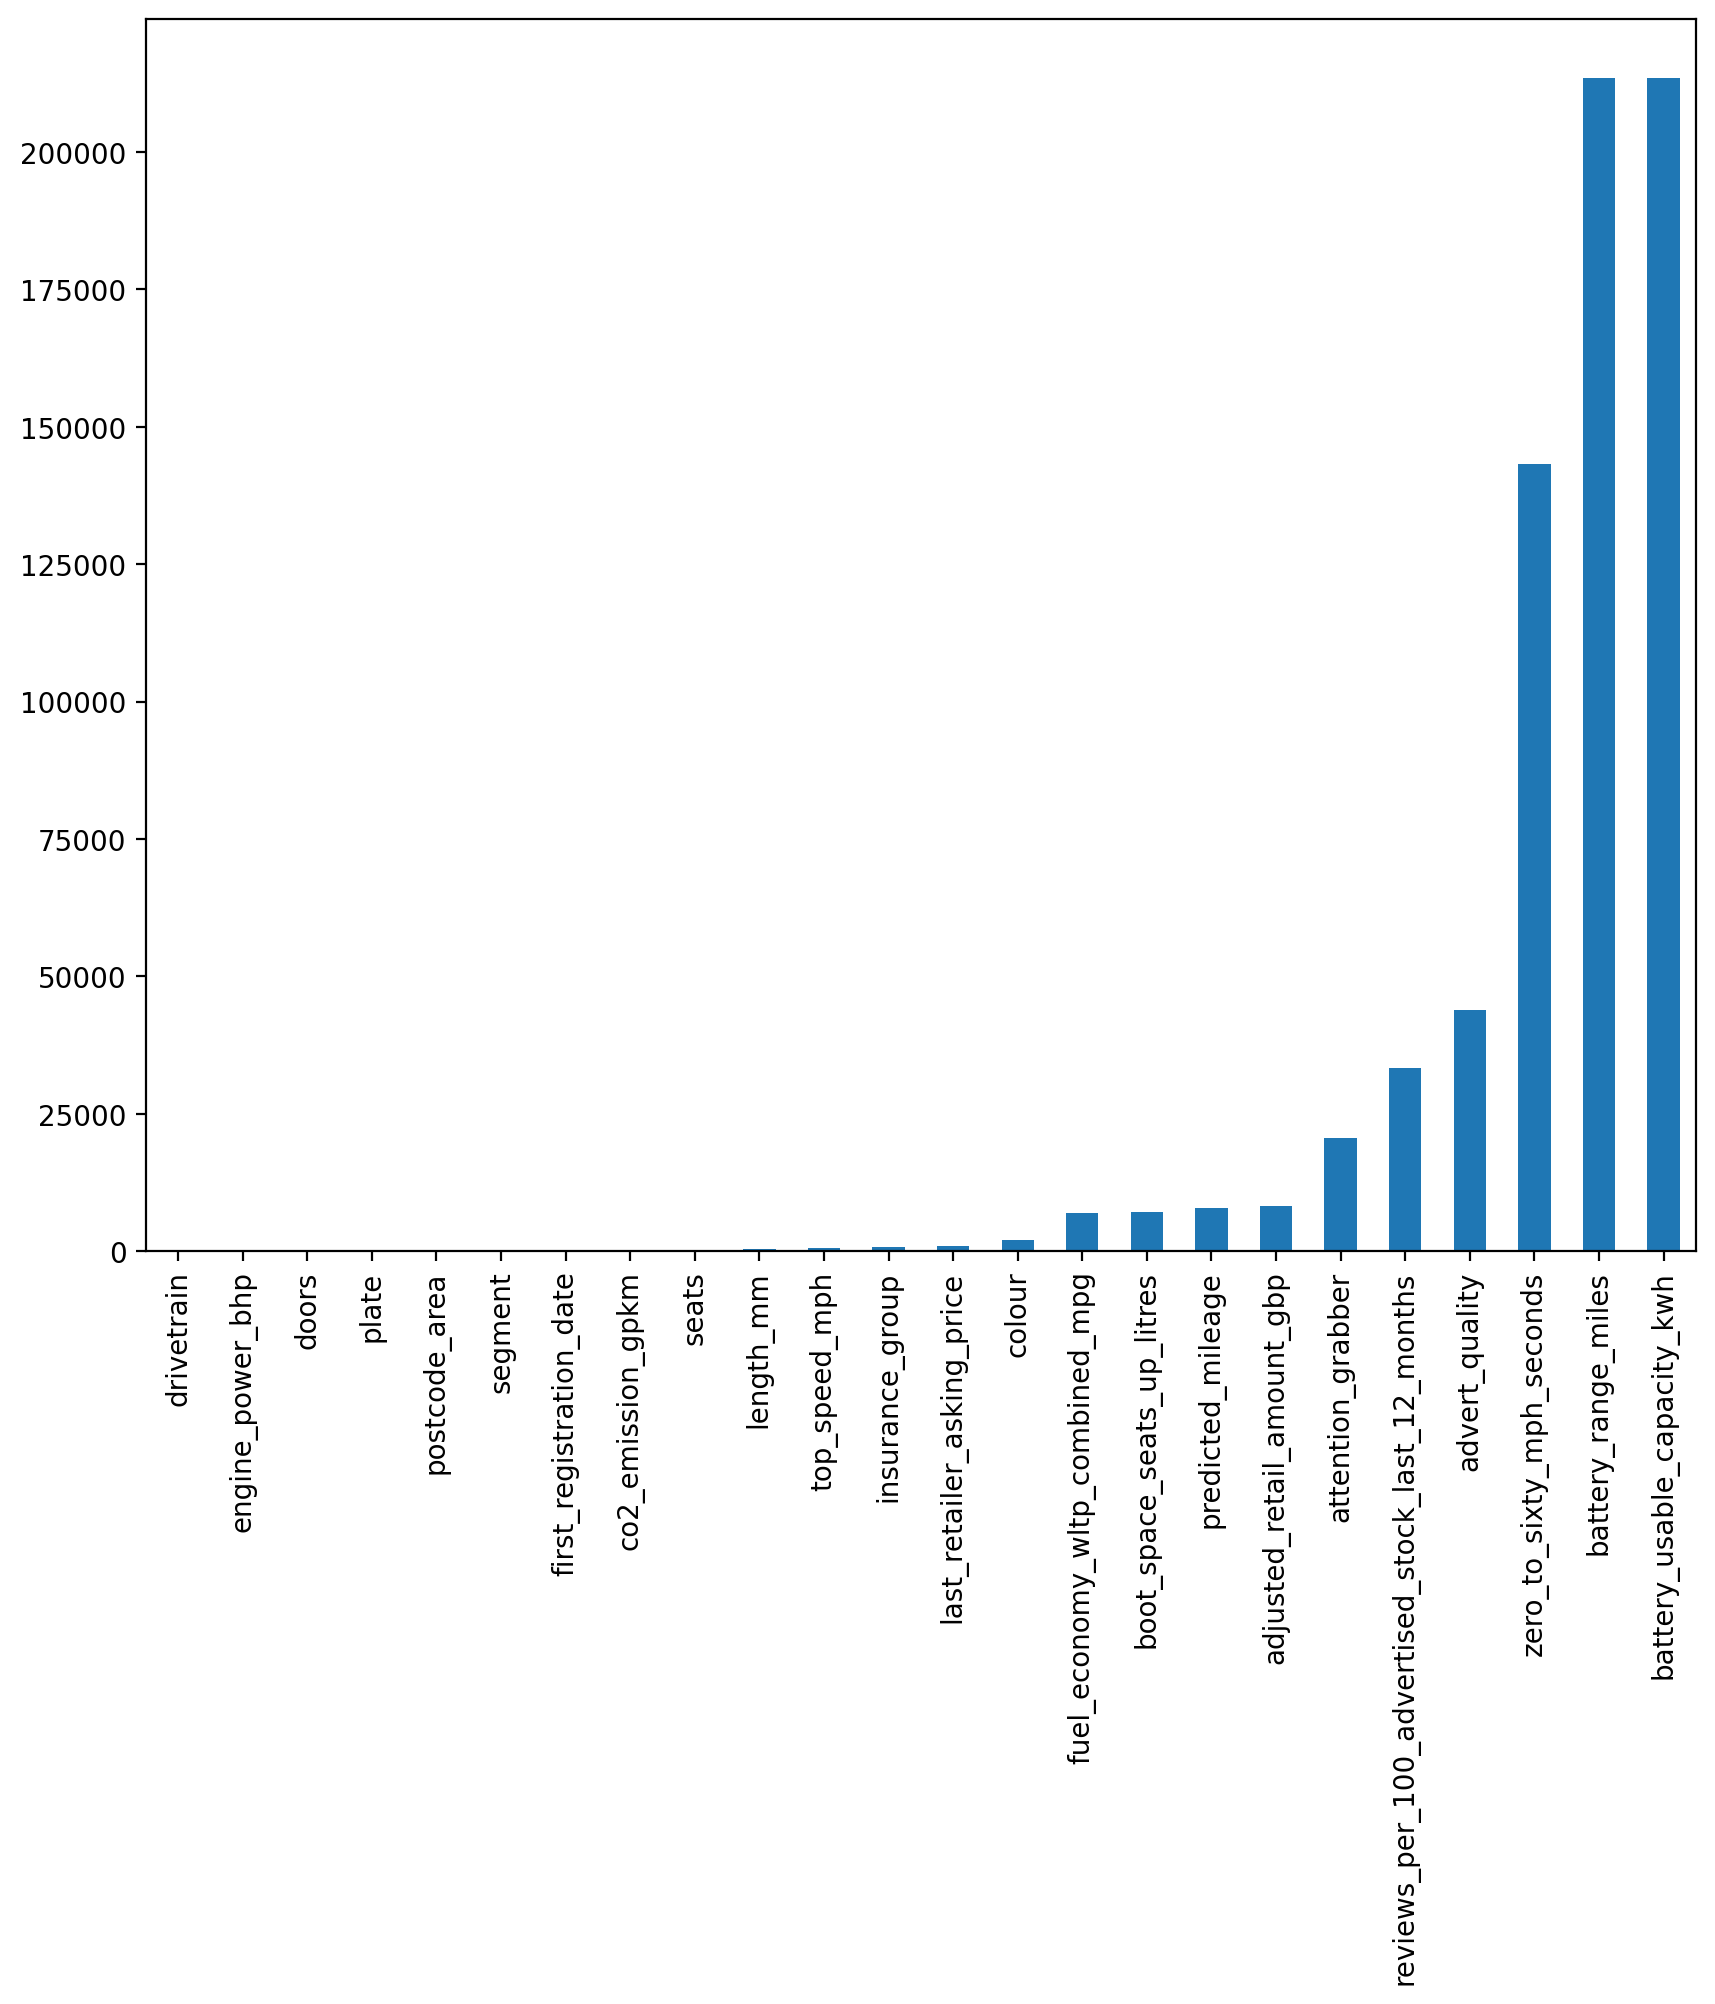

In [12]:
# plot missing values
missing = car.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize=(10,8))

In [13]:
car.dtypes

stock_item_id                                       object
last_date_seen                                      object
first_date_seen                                     object
days_to_sell                                         int32
first_retailer_asking_price                          int64
last_retailer_asking_price                         float64
can_home_deliver                                      bool
reviews_per_100_advertised_stock_last_12_months    float64
segment                                             object
seats                                              float64
doors                                              float64
co2_emission_gpkm                                  float64
top_speed_mph                                      float64
zero_to_sixty_mph_seconds                           object
engine_power_bhp                                    object
fuel_economy_wltp_combined_mpg                      object
battery_range_miles                                float

In [14]:
car['battery_range_miles'].value_counts().sum()

11061

## Creating two dataset from the existing dataset which are cars with batteries(cwb) and cars without batteries (cwtb)

In [15]:
cwb = car

In [16]:
cwb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224555 entries, 0 to 224554
Data columns (total 42 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   stock_item_id                                    224555 non-null  object 
 1   last_date_seen                                   224555 non-null  object 
 2   first_date_seen                                  224555 non-null  object 
 3   days_to_sell                                     224555 non-null  int32  
 4   first_retailer_asking_price                      224555 non-null  int64  
 5   last_retailer_asking_price                       223626 non-null  float64
 6   can_home_deliver                                 224555 non-null  bool   
 7   reviews_per_100_advertised_stock_last_12_months  191289 non-null  float64
 8   segment                                          224523 non-null  object 
 9   seats          

In [17]:
car.describe()

,days_to_sell,first_retailer_asking_price,last_retailer_asking_price,reviews_per_100_advertised_stock_last_12_months,seats,doors,co2_emission_gpkm,top_speed_mph,battery_range_miles,boot_space_seats_up_litres,odometer_reading_miles,adjusted_retail_amount_gbp,predicted_mileage,number_of_images,advert_quality
count,224555.000000,2.245550e+05,2.236260e+05,191289.000000,224426.000000,224551.000000,224438.000000,223902.000000,11061.000000,217354.000000,2.245550e+05,216389.000000,216704.000000,224555.000000,180623.000000
mean,44.423771,1.871680e+04,1.802800e+04,9.047877,4.938987,4.591042,132.613069,123.355705,153.349968,380.455584,4.461378e+04,18280.148672,43354.033474,32.612433,54.570791
std,56.751408,4.190931e+04,2.067387e+04,11.558496,0.672963,0.869274,43.868906,17.677968,111.317425,167.149296,3.305834e+04,14390.140083,26811.880940,18.789499,15.068191
min,0.000000,1.000000e+00,1.000000e+00,0.000000,1.000000,2.000000,0.000000,0.000000,15.000000,0.000000,0.000000e+00,349.000000,0.000000,0.000000,1.000000
25%,12.000000,8.995000e+03,8.900000e+03,1.500000,5.000000,5.000000,113.000000,112.000000,34.000000,290.000000,1.883000e+04,9465.000000,22686.000000,20.000000,46.000000
50%,28.000000,1.524900e+04,1.499100e+04,5.100000,5.000000,5.000000,129.000000,121.000000,168.000000,379.000000,3.772400e+04,15467.000000,38104.500000,31.000000,56.000000
75%,56.000000,2.299000e+04,2.204875e+04,12.600000,5.000000,5.000000,151.000000,134.000000,254.000000,480.000000,6.400000e+04,22692.000000,61719.250000,42.000000,65.000000
max,1829.000000,1.779950e+07,4.999995e+06,300.000000,9.000000,6.000000,567.000000,248.000000,464.000000,4610.000000,1.632147e+06,233997.000000,161264.000000,199.000000,100.000000


In [18]:
corr = cwb.corr()

In [19]:
corr

,days_to_sell,first_retailer_asking_price,last_retailer_asking_price,can_home_deliver,reviews_per_100_advertised_stock_last_12_months,seats,doors,co2_emission_gpkm,top_speed_mph,battery_range_miles,boot_space_seats_up_litres,odometer_reading_miles,manufacturer_approved,adjusted_retail_amount_gbp,predicted_mileage,number_of_images,advert_quality
days_to_sell,1.000000,0.048439,0.058169,-0.016604,-0.015758,-0.040061,-0.055559,0.010939,0.055982,0.051587,-0.002013,-0.031560,0.011918,0.074533,-0.031750,0.090179,-0.028269
first_retailer_asking_price,0.048439,1.000000,0.380458,0.005953,0.002578,-0.024577,-0.030931,0.125529,0.209490,0.115670,0.087705,-0.179779,0.127687,0.956200,-0.189891,0.045686,0.010217
last_retailer_asking_price,0.058169,0.380458,1.000000,0.014552,0.003298,-0.036122,-0.052414,0.249278,0.402776,0.090440,0.191042,-0.349437,0.255490,0.787205,-0.379145,0.092567,0.022515
can_home_deliver,-0.016604,0.005953,0.014552,1.000000,0.179615,0.011618,0.016290,-0.031081,0.029845,0.020602,0.021764,-0.066532,-0.110627,0.019910,-0.057067,0.035874,-0.118153
reviews_per_100_advertised_stock_last_12_months,-0.015758,0.002578,0.003298,0.179615,1.000000,0.006026,0.006585,-0.006494,0.007276,0.034238,0.005692,-0.016542,-0.051086,0.011895,-0.014590,0.062440,-0.017178
seats,-0.040061,-0.024577,-0.036122,0.011618,0.006026,1.000000,0.560627,0.008163,-0.125522,-0.062034,0.196880,0.059412,0.010255,0.017937,0.077692,0.025252,0.031236
doors,-0.055559,-0.030931,-0.052414,0.016290,0.006585,0.560627,1.000000,-0.141235,-0.272954,0.038728,0.259344,-0.078325,0.055921,-0.022023,-0.082757,0.012104,-0.065221
co2_emission_gpkm,0.010939,0.125529,0.249278,-0.031081,-0.006494,0.008163,-0.141235,1.000000,0.437416,-0.828975,0.160517,0.089417,0.016210,0.288379,0.052604,0.023570,0.057079
top_speed_mph,0.055982,0.209490,0.402776,0.029845,0.007276,-0.125522,-0.272954,0.437416,1.000000,-0.234064,0.186866,-0.007230,0.116268,0.482628,-0.003777,0.096352,0.153803
battery_range_miles,0.051587,0.115670,0.090440,0.020602,0.034238,-0.062034,0.038728,-0.828975,-0.234064,1.000000,0.123105,-0.302462,-0.031457,0.108173,-0.415587,-0.049353,0.042358


<Axes: >

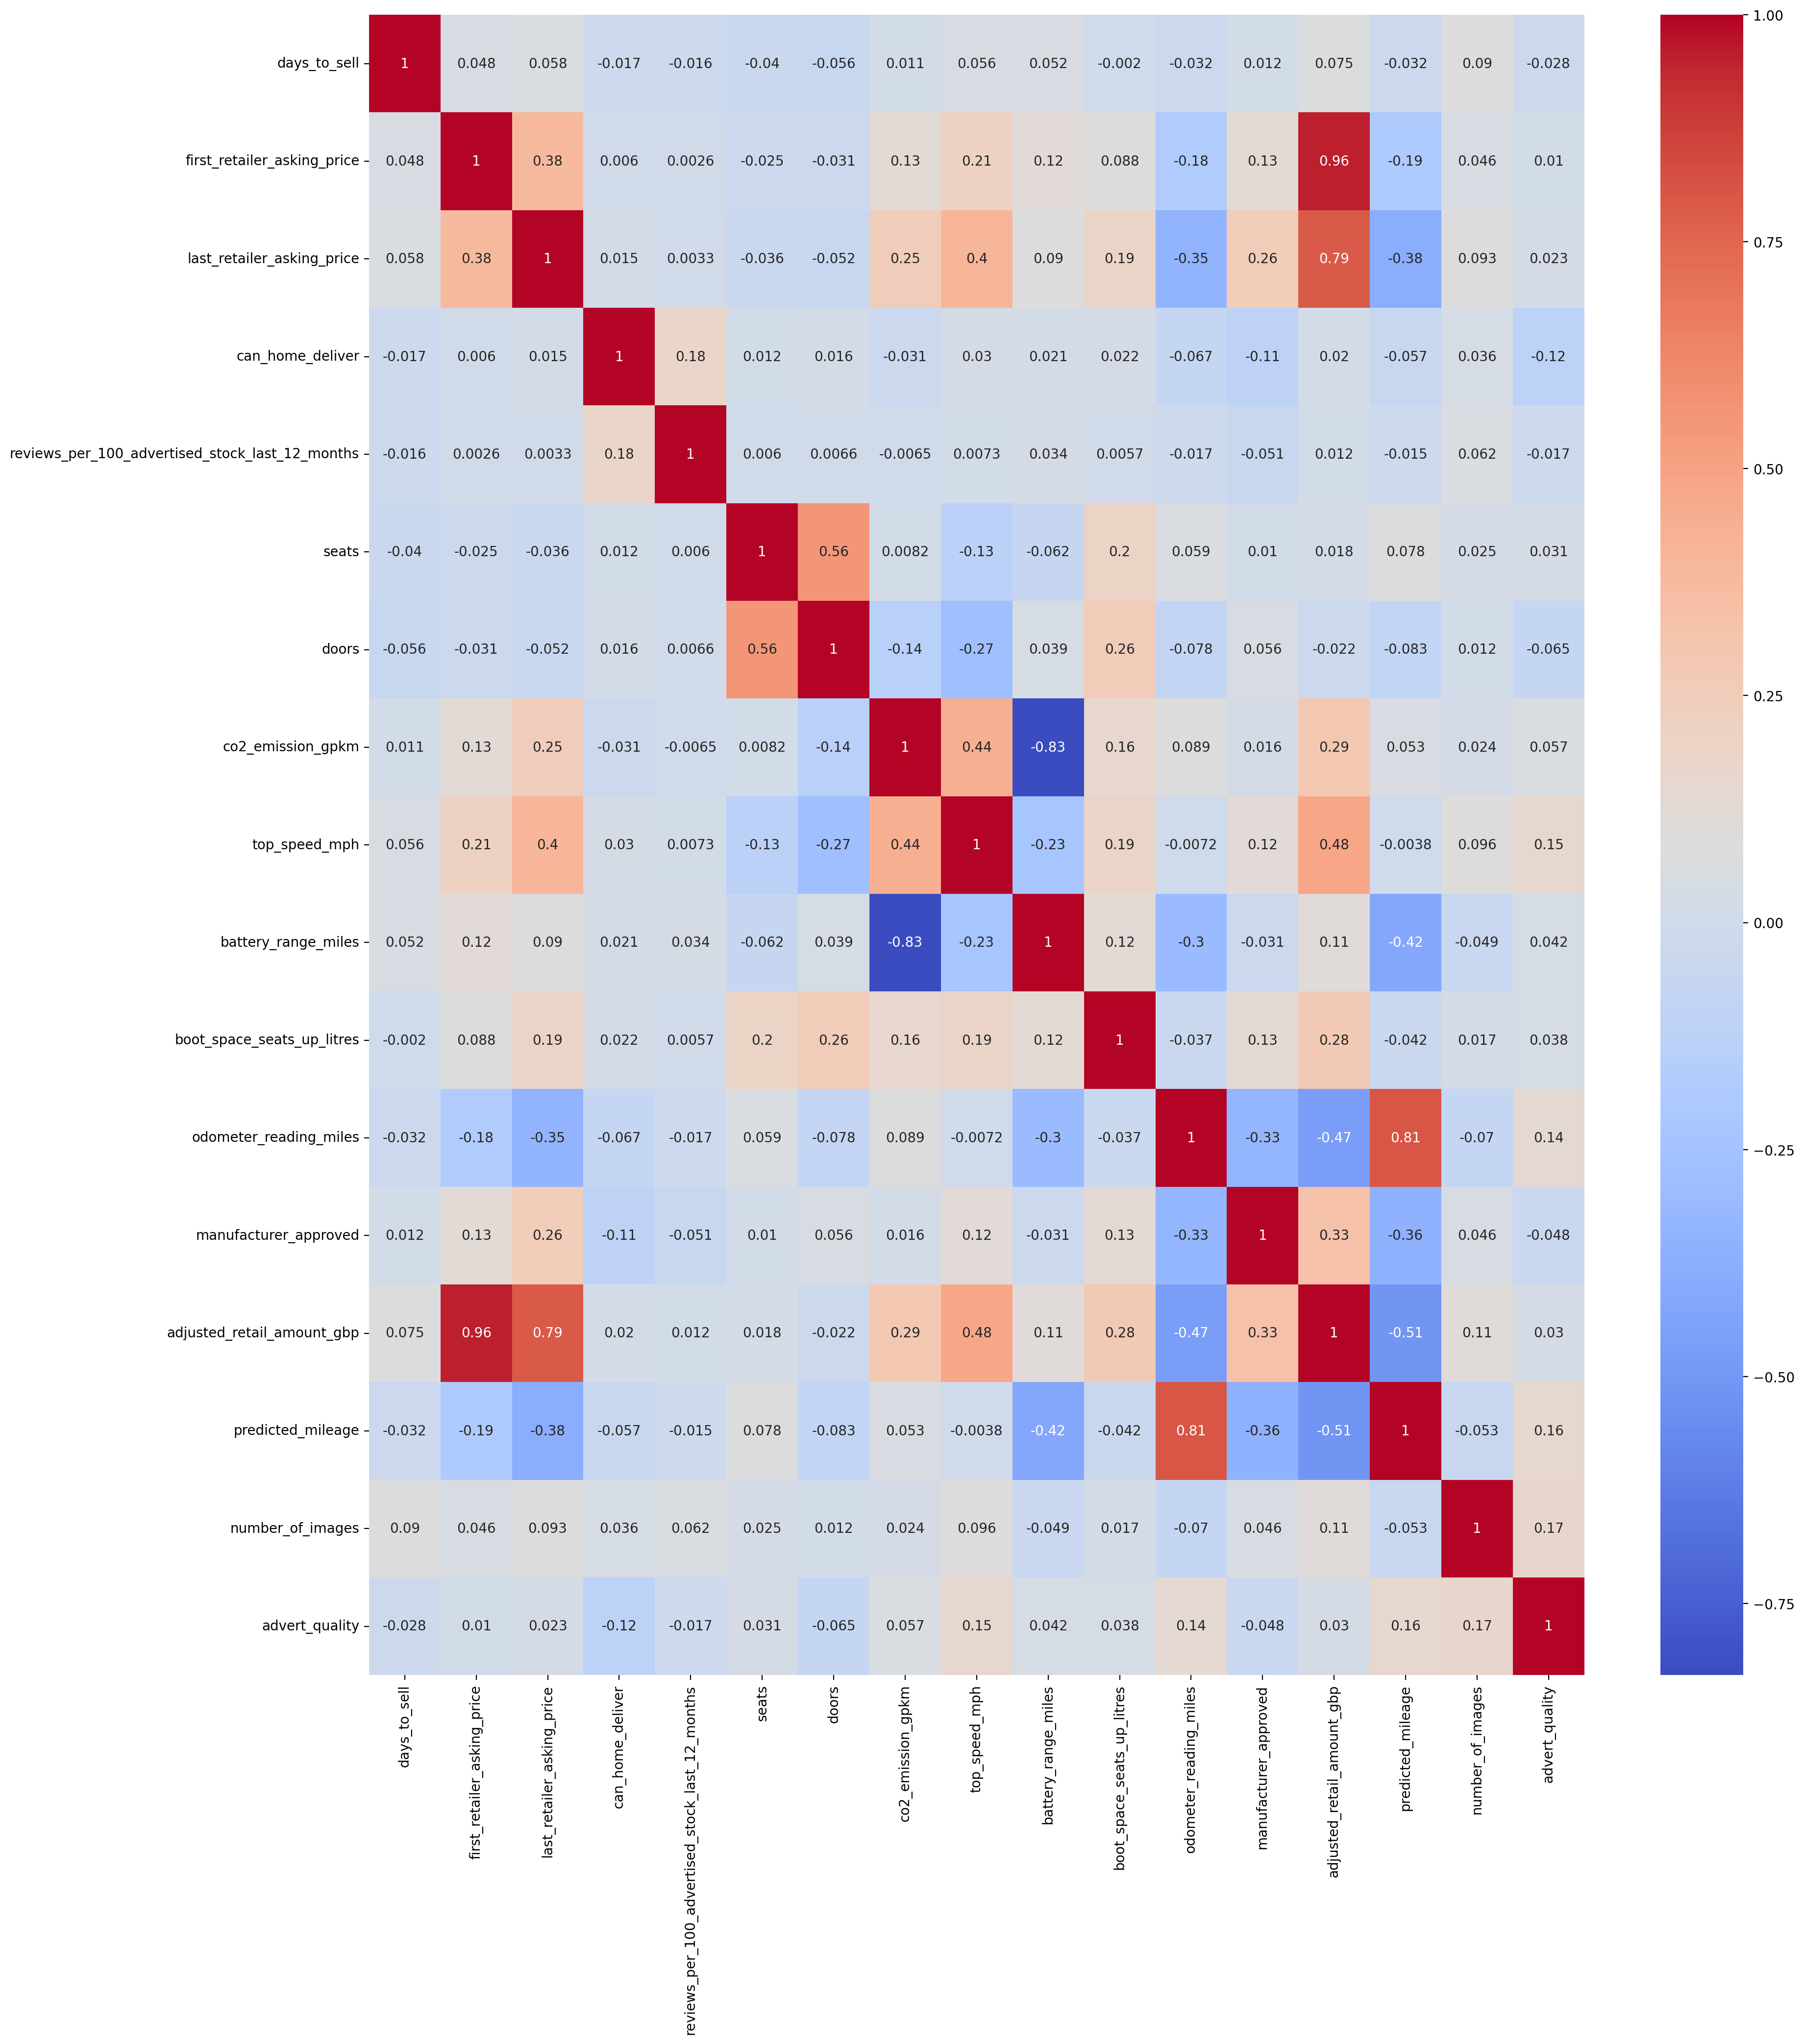

In [20]:
plt.figure(figsize=(20, 22))
sns.heatmap(corr, annot=True, cmap='coolwarm')

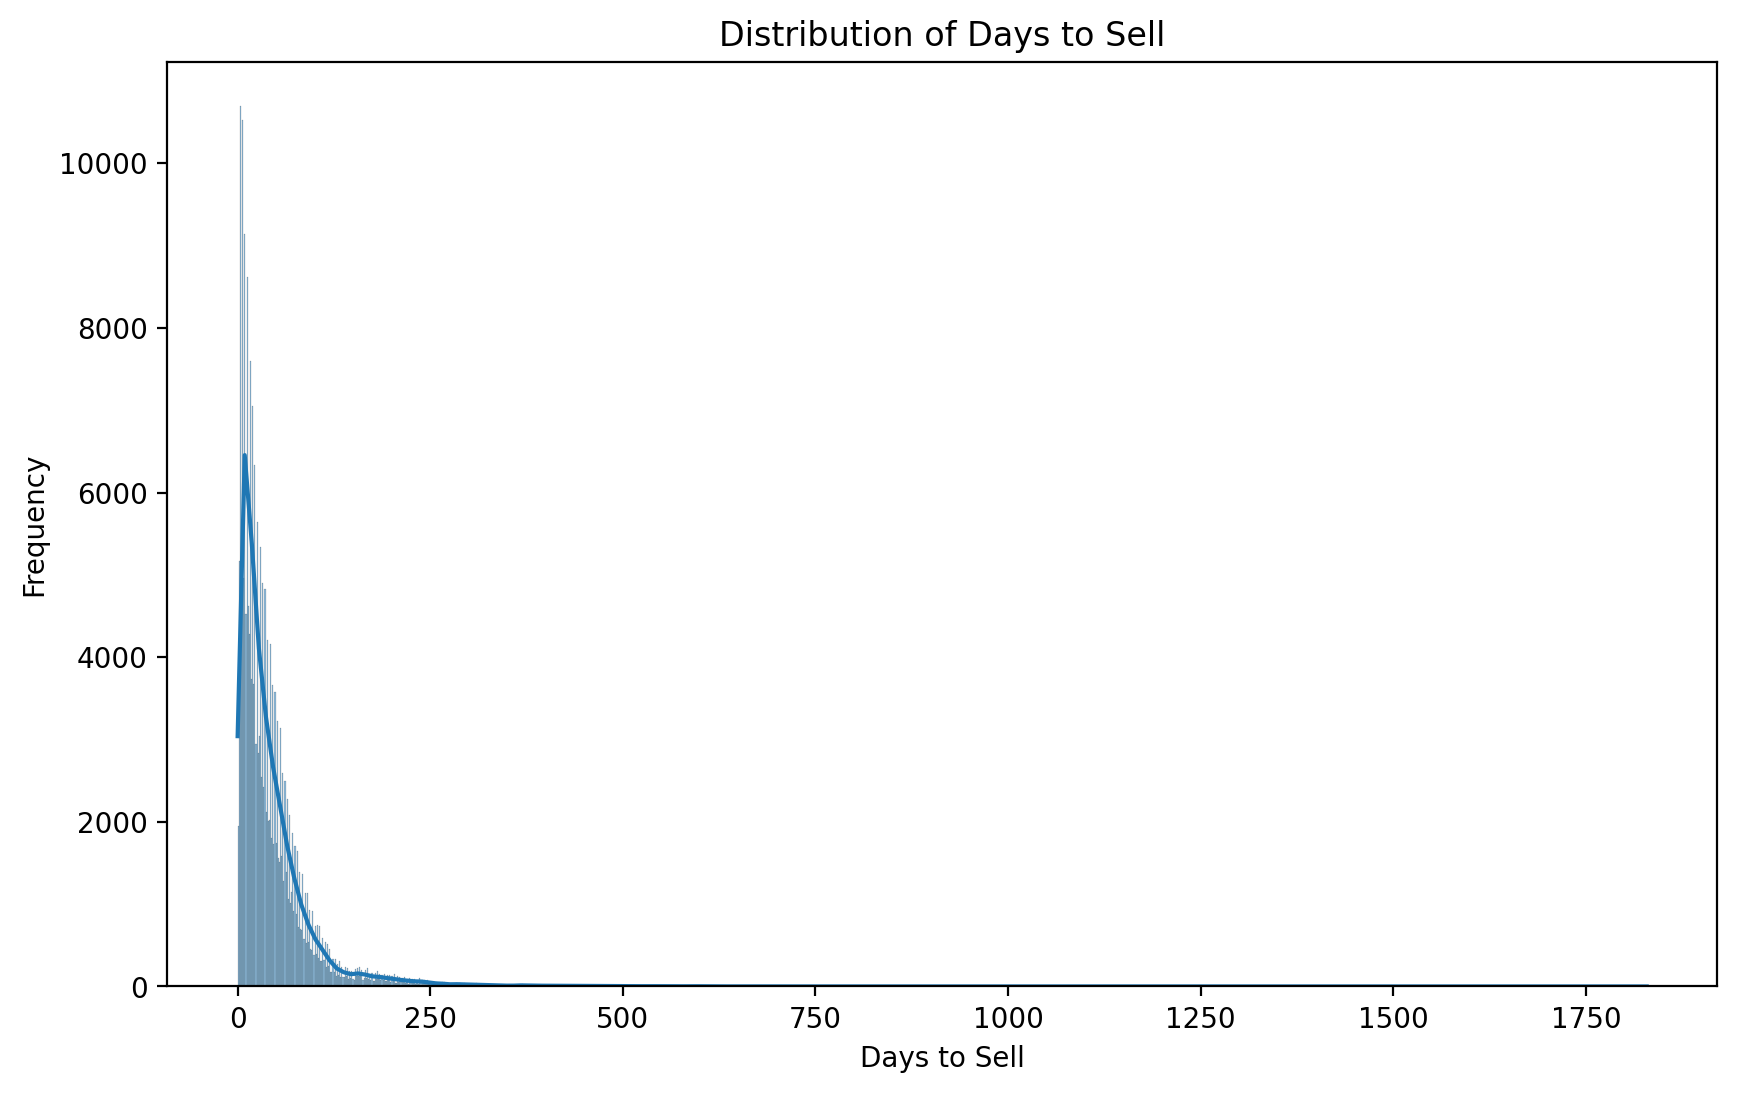

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cwb, x='days_to_sell', kde=True)
plt.title('Distribution of Days to Sell')
plt.xlabel('Days to Sell')
plt.ylabel('Frequency')
plt.show()

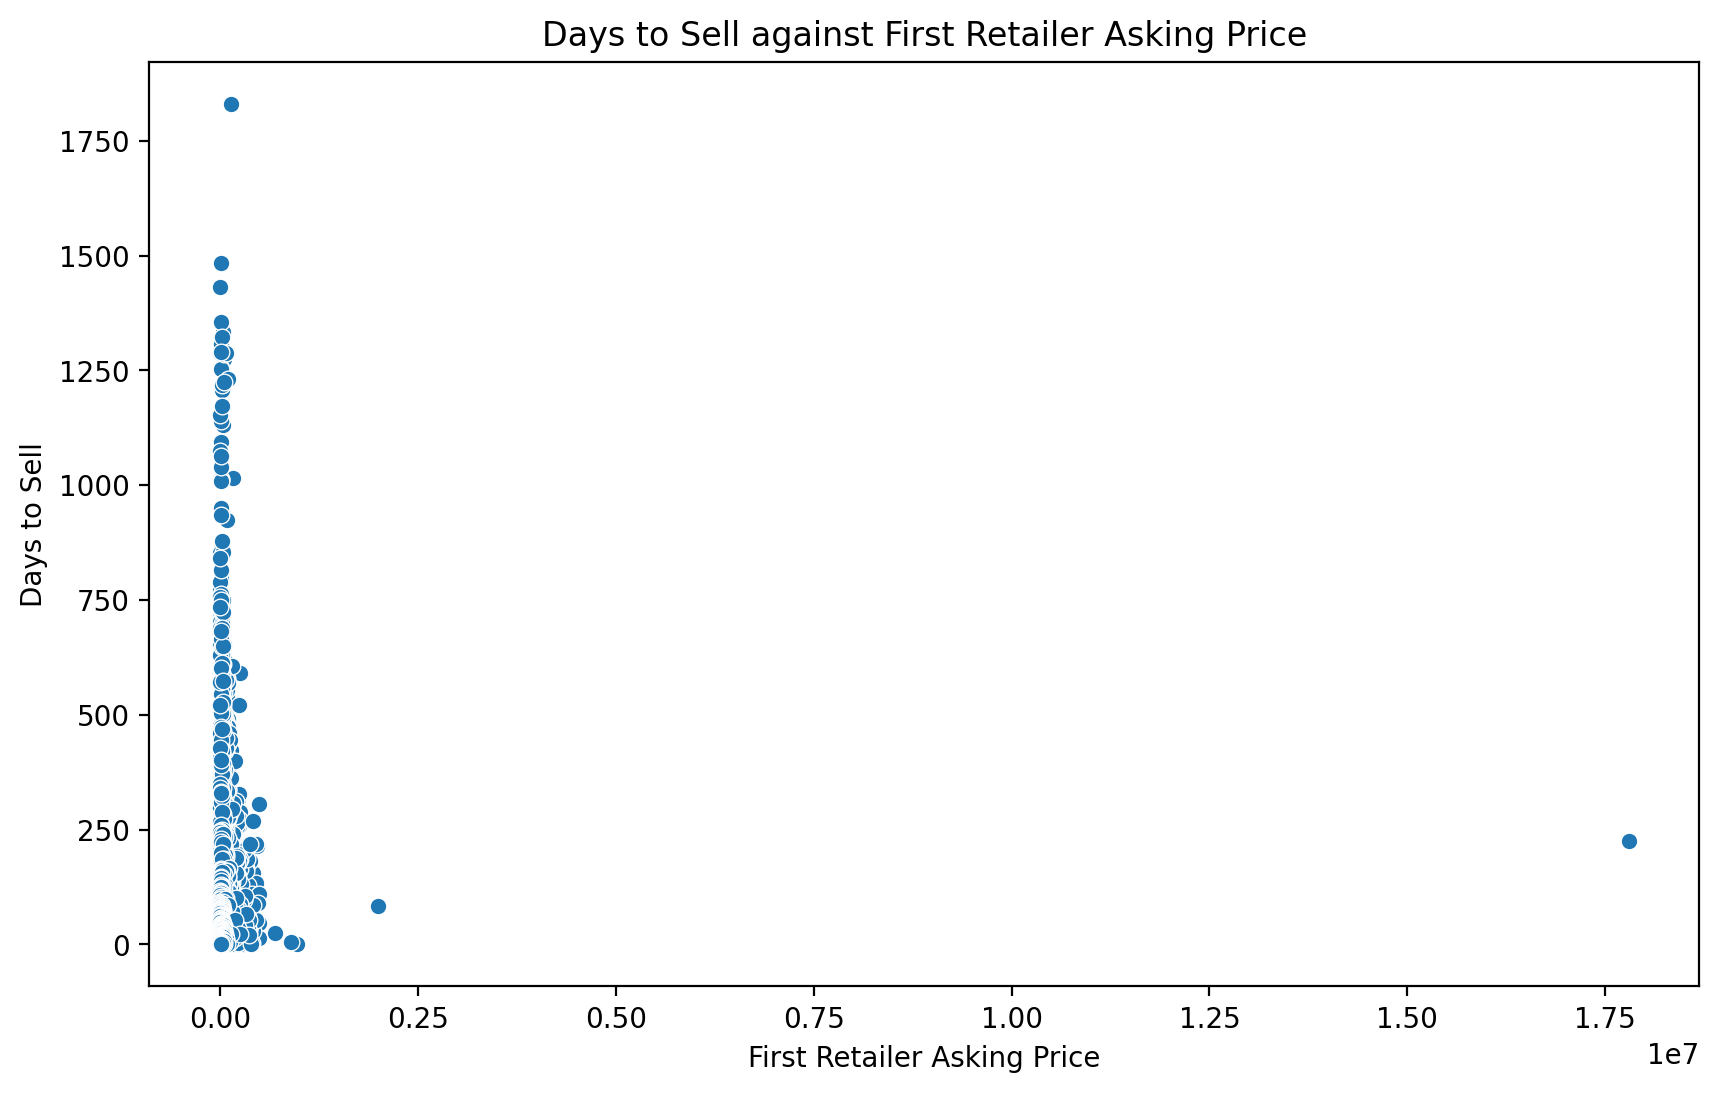

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cwb, x='first_retailer_asking_price', y='days_to_sell')
plt.title('Days to Sell against First Retailer Asking Price')
plt.xlabel('First Retailer Asking Price')
plt.ylabel('Days to Sell')
plt.show()

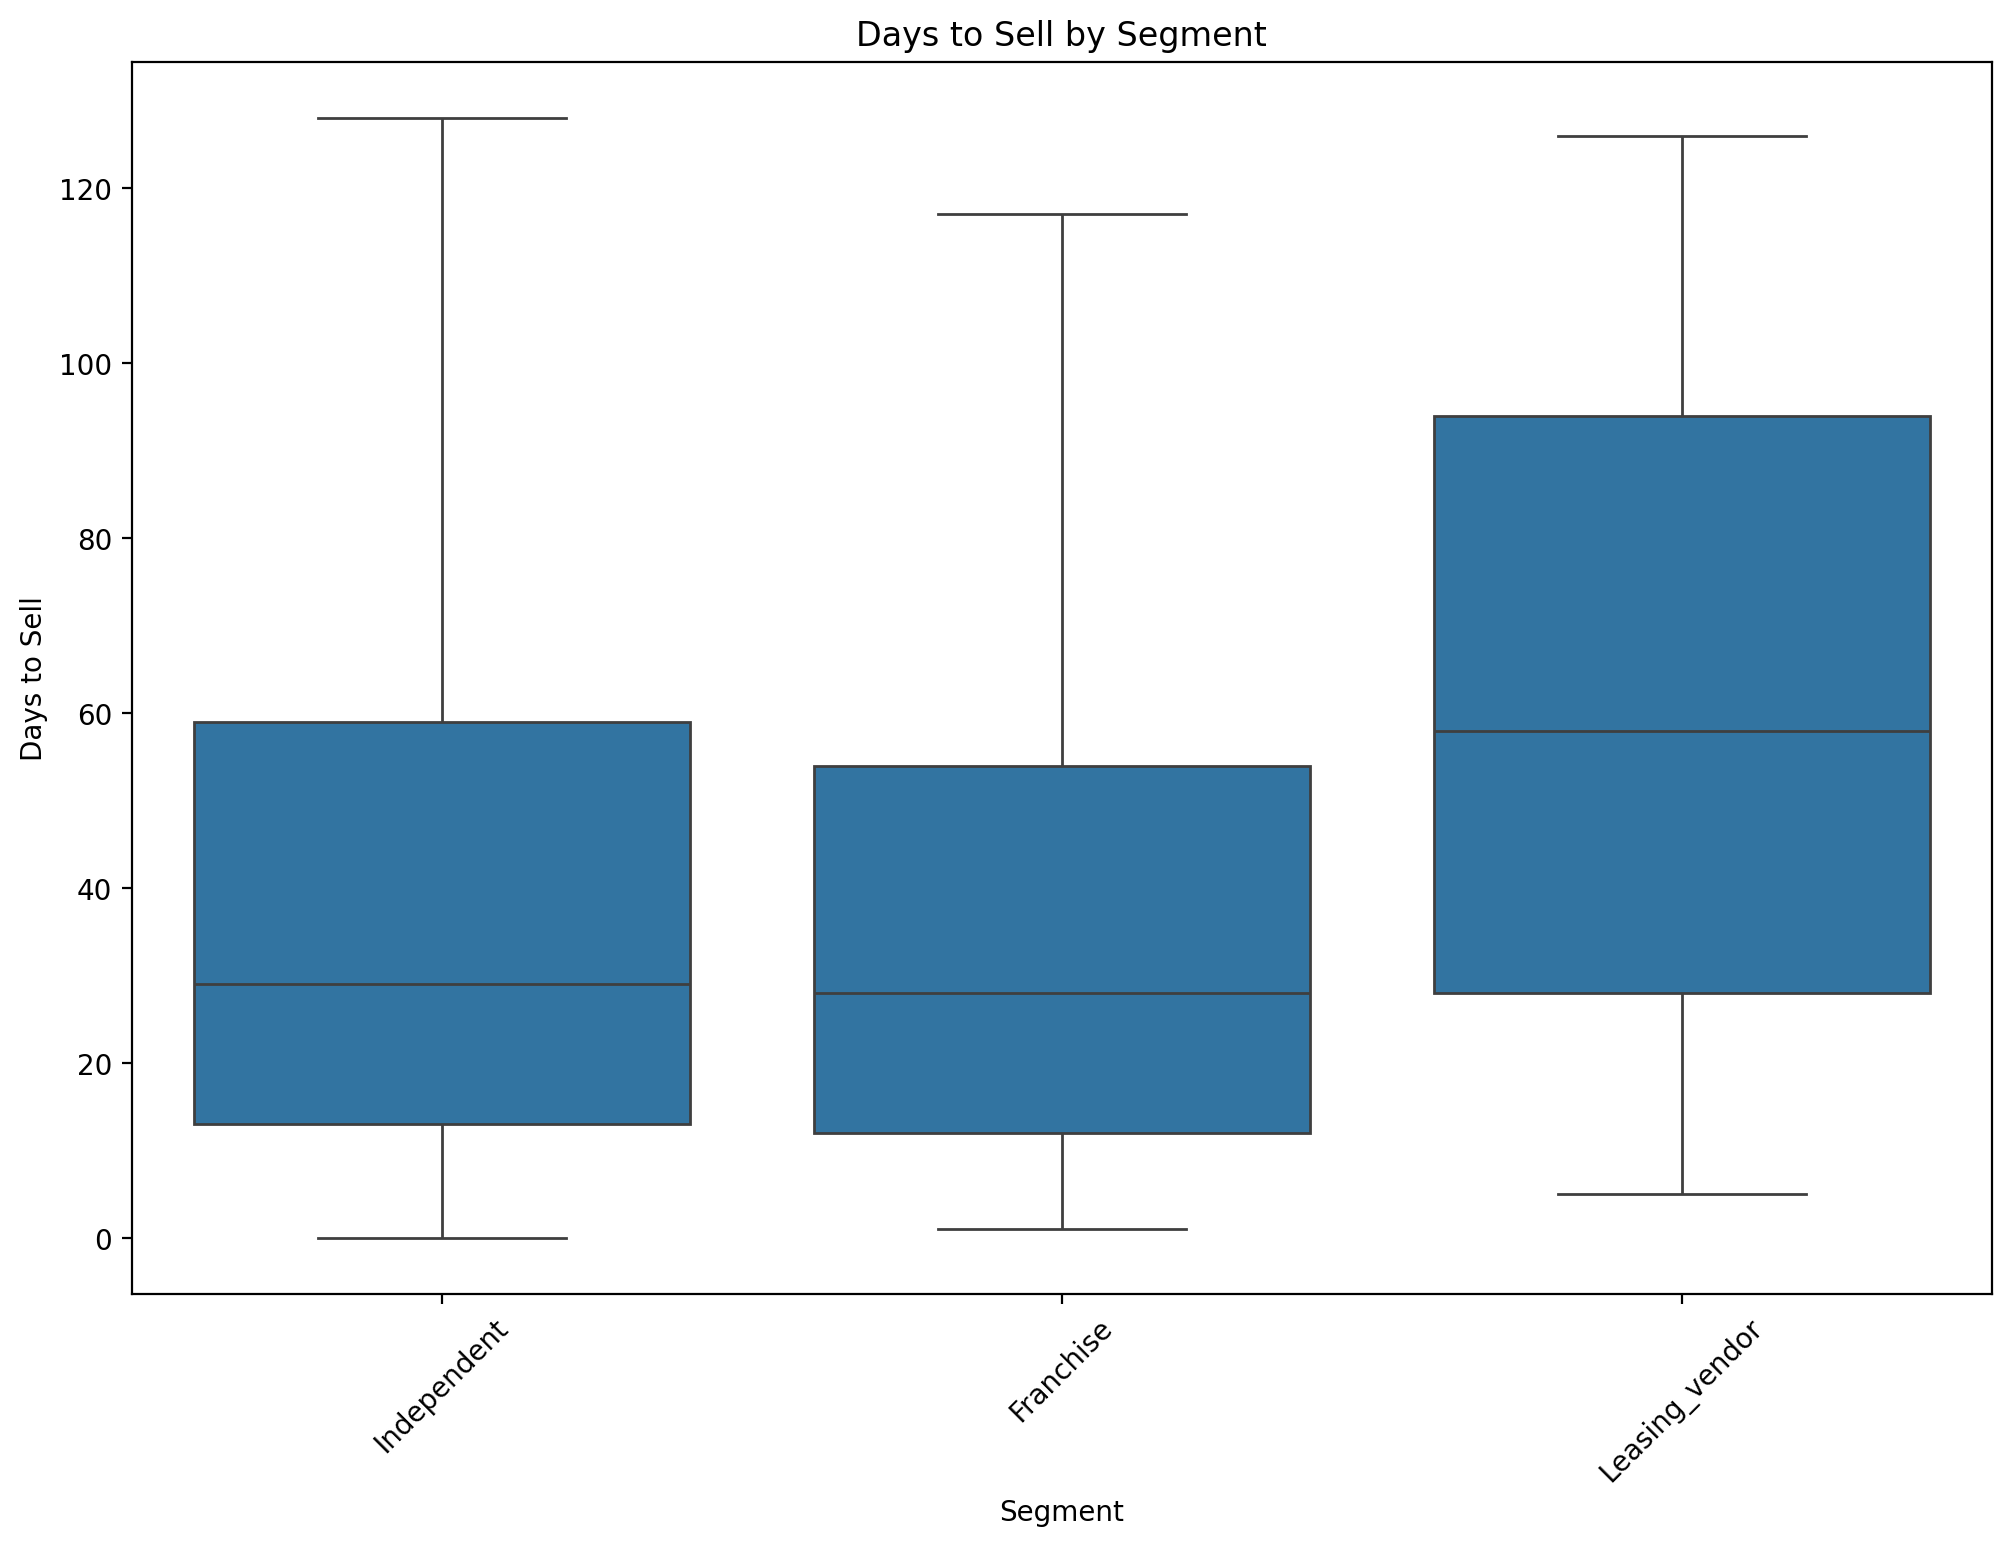

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=cwb, x='segment', y='days_to_sell', showfliers=False)
plt.title('Days to Sell by Segment')
plt.xlabel('Segment')
plt.ylabel('Days to Sell')
plt.xticks(rotation=45)
plt.show()

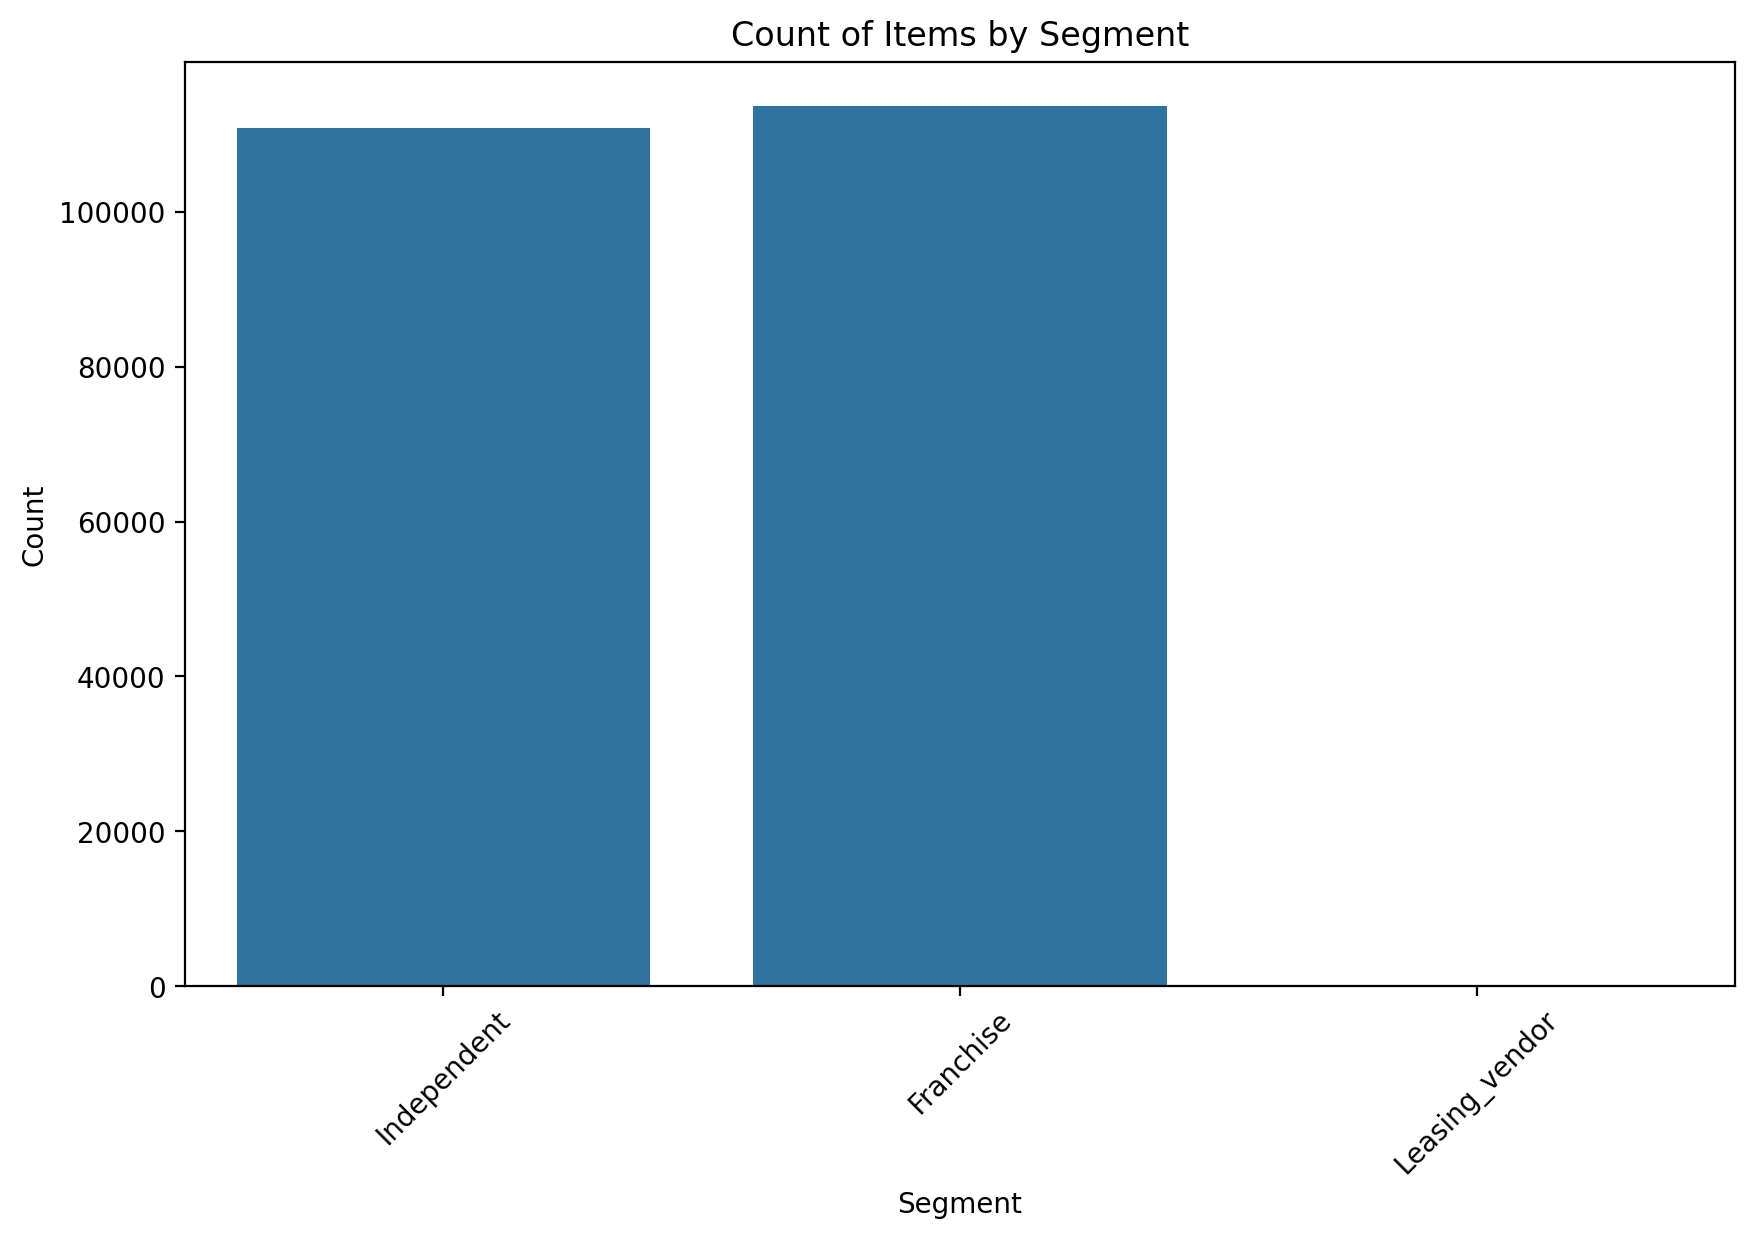

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cwb, x='segment')
plt.title('Count of Items by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

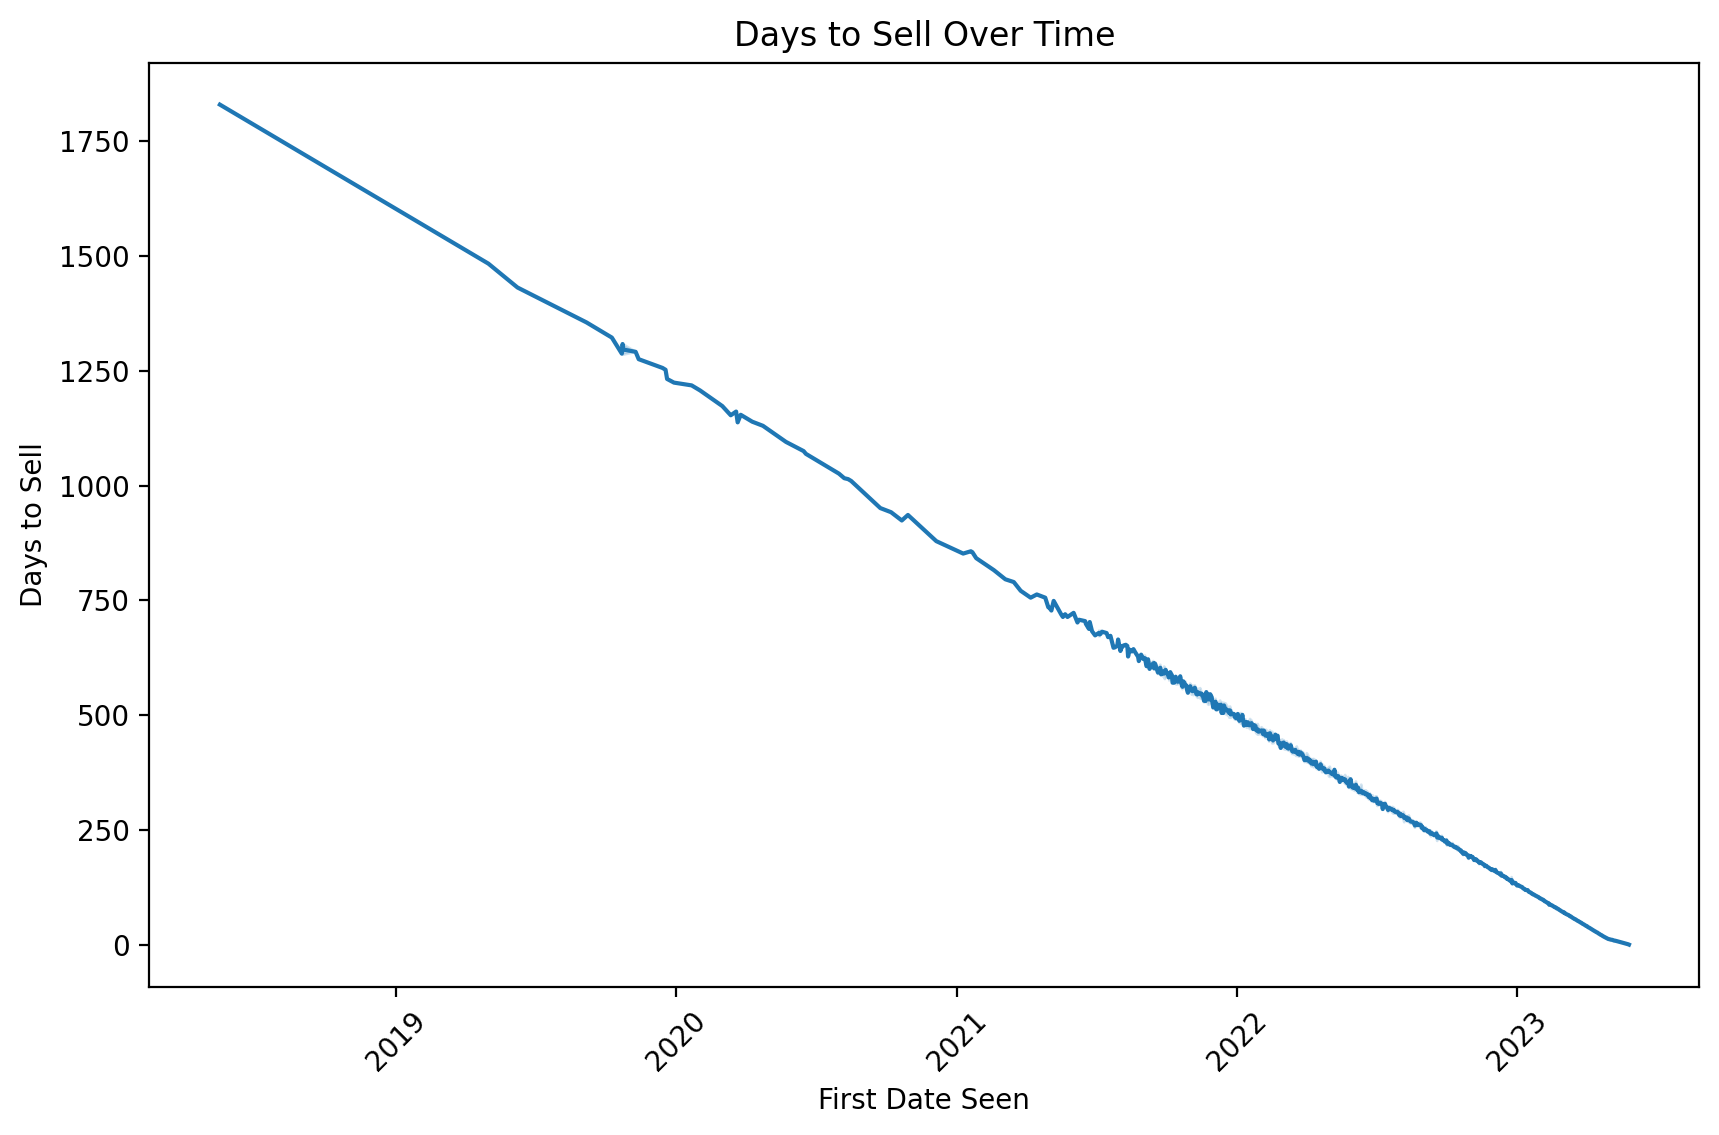

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=cwb, x='first_date_seen', y='days_to_sell')
plt.title('Days to Sell Over Time')
plt.xlabel('First Date Seen')
plt.ylabel('Days to Sell')
plt.xticks(rotation=45)
plt.show()

In [26]:
cwb = cwb.drop(columns=['battery_usable_capacity_kwh', 'battery_range_miles','predicted_mileage', 'number_of_images'])

In [27]:
cwb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224555 entries, 0 to 224554
Data columns (total 38 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   stock_item_id                                    224555 non-null  object 
 1   last_date_seen                                   224555 non-null  object 
 2   first_date_seen                                  224555 non-null  object 
 3   days_to_sell                                     224555 non-null  int32  
 4   first_retailer_asking_price                      224555 non-null  int64  
 5   last_retailer_asking_price                       223626 non-null  float64
 6   can_home_deliver                                 224555 non-null  bool   
 7   reviews_per_100_advertised_stock_last_12_months  191289 non-null  float64
 8   segment                                          224523 non-null  object 
 9   seats          

In [28]:
def missing_value_describe(data):
    # check missing values in the data
    total = data.isna().sum().sort_values(ascending=False)
    missing_value_pct_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_pct_stats > 0)

    missing_data = pd.concat([total, missing_value_pct_stats], axis=1, keys=['Total', 'Percentage(%)'])

    print("Number of rows with at least 1 missing values:", cwb.isna().any(axis = 1).sum())
    print("Number of columns with missing values:", missing_value_col_count)

    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        display(missing_data[:missing_value_col_count])

    else:
        print("No missing data!!!")
missing_value_describe(cwb)

Number of rows with at least 1 missing values: 175708
Number of columns with missing values: 21

Missing percentage (desceding):


,Total,Percentage(%)
zero_to_sixty_mph_seconds,143152,63.749193
advert_quality,43932,19.564027
reviews_per_100_advertised_stock_last_12_months,33266,14.814188
attention_grabber,20533,9.143862
adjusted_retail_amount_gbp,8166,3.636526
boot_space_seats_up_litres,7201,3.206787
fuel_economy_wltp_combined_mpg,6868,3.058493
colour,2072,0.922714
last_retailer_asking_price,929,0.413707
insurance_group,708,0.315290


In [29]:
cwb['zero_to_sixty_mph_seconds'].isnull().value_counts()

True     143152
False     81403
Name: zero_to_sixty_mph_seconds, dtype: int64

In [30]:
cwb['fuel_economy_wltp_combined_mpg']

0         22.1
1         50.4
2         44.8
3         60.1
4         49.6
          ... 
224550    53.3
224551    45.6
224552    57.6
224553    43.5
224554    53.3
Name: fuel_economy_wltp_combined_mpg, Length: 224555, dtype: object

# Data Preprocessing

Handling Missing Values

In [31]:
# Convert the column to numeric, coercing errors to NaN for non-numeric values
cwb['zero_to_sixty_mph_seconds'] = pd.to_numeric(cwb['zero_to_sixty_mph_seconds'], errors='coerce')

In [33]:
from sklearn.impute import KNNImputer

# Identify features with high missing values
zero_to_sixty_mph_seconds = ['zero_to_sixty_mph_seconds']

# Dropping non-numeric columns
data_missing = cwb[zero_to_sixty_mph_seconds].copy()

# Initialize KNN imputer
imputer = KNNImputer()

# Apply KNN imputation to features with high missing values
data_imputed = imputer.fit_transform(data_missing)

# Convert the imputed array back to a DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=zero_to_sixty_mph_seconds)

# Replace the original features with the imputed values
cwb[zero_to_sixty_mph_seconds] = data_imputed_df

In [34]:
cwb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224555 entries, 0 to 224554
Data columns (total 38 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   stock_item_id                                    224555 non-null  object 
 1   last_date_seen                                   224555 non-null  object 
 2   first_date_seen                                  224555 non-null  object 
 3   days_to_sell                                     224555 non-null  int32  
 4   first_retailer_asking_price                      224555 non-null  int64  
 5   last_retailer_asking_price                       223626 non-null  float64
 6   can_home_deliver                                 224555 non-null  bool   
 7   reviews_per_100_advertised_stock_last_12_months  191289 non-null  float64
 8   segment                                          224523 non-null  object 
 9   seats          

In [35]:
from sklearn.impute import KNNImputer

missing_features = ['reviews_per_100_advertised_stock_last_12_months', 'adjusted_retail_amount_gbp']
data_missing = cwb[missing_features].copy()
imputer = KNNImputer()

data_imputed = imputer.fit_transform(data_missing)

data_imputed_df = pd.DataFrame(data_imputed, columns=missing_features)
cwb[missing_features] = data_imputed_df

In [36]:
cwb.isnull().sum()

stock_item_id                                          0
last_date_seen                                         0
first_date_seen                                        0
days_to_sell                                           0
first_retailer_asking_price                            0
last_retailer_asking_price                           929
can_home_deliver                                       0
reviews_per_100_advertised_stock_last_12_months        0
segment                                               32
seats                                                129
doors                                                  4
co2_emission_gpkm                                    117
top_speed_mph                                        653
zero_to_sixty_mph_seconds                              0
engine_power_bhp                                       2
fuel_economy_wltp_combined_mpg                      6868
length_mm                                            396
boot_space_seats_up_litres     

In [37]:
from sklearn.impute import SimpleImputer

features_with_missing = ['advert_quality', 'attention_grabber','engine_power_bhp', 'drivetrain',
                          'boot_space_seats_up_litres', 'fuel_economy_wltp_combined_mpg', 'colour',
                          'insurance_group', 'top_speed_mph', 'length_mm', 'seats', 'co2_emission_gpkm',
                          'first_registration_date', 'postcode_area', 'segment', 'doors', 'plate'
                          ]

imputer = SimpleImputer(strategy='most_frequent')

cwb[features_with_missing] = imputer.fit_transform(cwb[features_with_missing])

print(cwb.isnull().sum())

stock_item_id                                          0
last_date_seen                                         0
first_date_seen                                        0
days_to_sell                                           0
first_retailer_asking_price                            0
last_retailer_asking_price                           929
can_home_deliver                                       0
reviews_per_100_advertised_stock_last_12_months        0
segment                                               32
seats                                                  0
doors                                                  0
co2_emission_gpkm                                      0
top_speed_mph                                          0
zero_to_sixty_mph_seconds                              0
engine_power_bhp                                       2
fuel_economy_wltp_combined_mpg                      6868
length_mm                                            396
boot_space_seats_up_litres     

In [38]:
cwb['fuel_economy_wltp_combined_mpg'] = pd.to_numeric(cwb['fuel_economy_wltp_combined_mpg'], errors='coerce')

cwb['length_mm'] = pd.to_numeric(cwb['length_mm'], errors='coerce')

cwb['engine_power_bhp'] = pd.to_numeric(cwb['engine_power_bhp'], errors='coerce')

cwb['insurance_group'] = pd.to_numeric(cwb['insurance_group'], errors='coerce')

In [39]:
num_features_with_missing = ['fuel_economy_wltp_combined_mpg', 'length_mm', 'engine_power_bhp', 'insurance_group']

imputer = SimpleImputer(strategy='mean')
cwb[num_features_with_missing] = imputer.fit_transform(cwb[num_features_with_missing])
print(cwb.isnull().sum())

stock_item_id                                          0
last_date_seen                                         0
first_date_seen                                        0
days_to_sell                                           0
first_retailer_asking_price                            0
last_retailer_asking_price                           929
can_home_deliver                                       0
reviews_per_100_advertised_stock_last_12_months        0
segment                                               32
seats                                                  0
doors                                                  0
co2_emission_gpkm                                      0
top_speed_mph                                          0
zero_to_sixty_mph_seconds                              0
engine_power_bhp                                       0
fuel_economy_wltp_combined_mpg                         0
length_mm                                              0
boot_space_seats_up_litres     

In [40]:
cwb.dropna(inplace=True)

In [41]:
from collections import Counter
from collections import OrderedDict

def detect_outliers(cwb, n, features_list):
    outlier_indices = []
    for feature in features_list:
        Q1 = np.percentile(cwb[feature], 25)
        Q3 = np.percentile(cwb[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = cwb[(cwb[feature] < Q1 - outlier_step) | (cwb[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

In [42]:
# Feature: Advertisement Duration
cwb['advertisement_duration_days'] = (pd.to_datetime(cwb['last_date_seen']) - pd.to_datetime(cwb['first_date_seen'])).dt.days

# Feature: Price Change
cwb['price_change_percentage'] = (cwb['adjusted_retail_amount_gbp'].diff() / cwb['adjusted_retail_amount_gbp'].shift(1)) * 100

# Feature: Popularity Metrics
cwb['reviews_per_day'] = cwb['reviews_per_100_advertised_stock_last_12_months'] / 365

# Feature: Competition
cwb['similar_cars_listed'] = cwb.groupby(['make', 'model', 'generation', 'first_registration_date']).transform('count')['stock_item_id']

In [43]:
# Calculate price discount percentage
cwb['price_discount_percentage'] = ((cwb['first_retailer_asking_price'] - cwb['last_retailer_asking_price']) / cwb['first_retailer_asking_price']) * 100

In [44]:
from datetime import datetime
# Define the minimum acceptable date
min_acceptable_date = pd.Timestamp('1680-09-21')

# Convert out-of-bounds date strings to datetime objects
cwb['first_registration_date'] = pd.to_datetime(cwb['first_registration_date'], errors='coerce')

# Filter out rows with out-of-bounds dates in 'first_registration_date'
cwb = cwb[cwb['first_registration_date'] >= min_acceptable_date]

# Calculate age of the car
current_date = datetime.now()
cwb['car_age_years'] = current_date.year - cwb['first_registration_date'].dt.year

In [45]:
# Feature: Historical Sales
historical_sales_data = cwb.groupby(['make', 'model', 'generation', 'first_registration_date'])['days_to_sell'].mean().reset_index()
historical_sales_data.columns = ['make', 'model', 'generation', 'first_registration_date', 'avg_days_to_sell']
cwb = cwb.merge(historical_sales_data, on=['make', 'model', 'generation', 'first_registration_date'], how='left')

In [46]:
# Feature: Geographical Factors
cwb['urban_area'] = cwb['postcode_area'].apply(lambda x: 1 if x in ['NY', 'LA', 'CHI'] else 0)

# Feature: Vehicle Specifications
cwb['fuel_efficiency_km_per_liter'] = cwb['fuel_economy_wltp_combined_mpg'] * 0.425144  # Convert MPG to km/L

In [47]:
# Drop unnecessary columns
cwb.drop(['first_date_seen', 'last_date_seen', 'stock_item_id', 'postcode_area', 'plate'], axis=1, inplace=True)

In [48]:
cwb.drop(['first_retailer_asking_price', 'last_retailer_asking_price', 'derivative_id', 'fuel_efficiency_km_per_liter', 'urban_area', 'price_change_percentage', 'length_mm', 'first_registration_date'], axis=1, inplace=True)

In [49]:
cwb.to_csv('cwb.csv')

In [50]:
cwb_targ = cwb

In [51]:
categorical_features = cwb_targ.select_dtypes(include=['object', 'bool']).columns.tolist()

# numerical features
numerical_features = cwb_targ.select_dtypes(include=['int', 'float']).columns.tolist()

In [52]:
target_encoder = ce.TargetEncoder(cols=categorical_features)

# Fit and transform the categorical features using target encoding
cwb_encoded = target_encoder.fit_transform(cwb_targ, cwb_targ['days_to_sell'])

# Initialize StandardScaler for numerical features
scaler = StandardScaler()

# Normalize numerical features
cwb_encoded[numerical_features] = scaler.fit_transform(cwb_targ[numerical_features])

In [53]:
cwb_encoded.sample()

,days_to_sell,can_home_deliver,reviews_per_100_advertised_stock_last_12_months,segment,seats,doors,co2_emission_gpkm,top_speed_mph,zero_to_sixty_mph_seconds,engine_power_bhp,...,manufacturer_approved,price_indicator_rating,adjusted_retail_amount_gbp,advert_quality,advertisement_duration_days,reviews_per_day,similar_cars_listed,price_discount_percentage,car_age_years,avg_days_to_sell
84979,1.137989,45.917893,0.531741,48.560184,52.439004,62.472679,45.559687,57.744127,-2.890865,1.901866,...,45.020187,37.934996,-0.036678,45.185158,1.137989,0.531741,-0.340424,0.022978,0.439825,1.299668


In [54]:
X = cwb_encoded.drop(columns=['days_to_sell'])
y = cwb_encoded['days_to_sell']

In [55]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(161721, 33) (40431, 33) (161721,) (40431,)


# Model Selection

In [57]:
model_rmse = OrderedDict()
model_r2 = OrderedDict()
model_mae = OrderedDict()
model_ev = OrderedDict()

## Linear Regression

In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
lr_y_pred = lr.predict(X_test)

In [60]:
lr_mse = round(mean_squared_error(y_test, lr_y_pred), 3)
lr_rmse = round(sqrt(lr_mse), 3)

lr_r2 = round(r2_score(y_test, lr_y_pred), 3)
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_ev = explained_variance_score(y_test, lr_y_pred)

model_rmse['Multi Linear Regression'] = lr_rmse
model_r2['Multi Linear Regression'] = lr_r2

model_mae['Multi Linear Regression'] = lr_mae
model_ev['Multi Linear Regression'] = lr_ev

print('Root Mean Squared Error of Multi Linear Regression model is :', lr_rmse)
print('R Squared of Multi Linear Regression model is :', lr_r2)
print('Mean Absolute Error for Multi Linear Regression is:', lr_mae)
print('Explained Variance Score for Multi Linear Regression is:', lr_ev)

Root Mean Squared Error of Multi Linear Regression model is : 0.0
R Squared of Multi Linear Regression model is : 1.0
Mean Absolute Error for Multi Linear Regression is: 7.646167322422316e-16
Explained Variance Score for Multi Linear Regression is: 1.0


In [61]:
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)

print('Train Score:', lr_train_score)
print('Test Score:', lr_test_score)

Train Score: 1.0
Test Score: 1.0


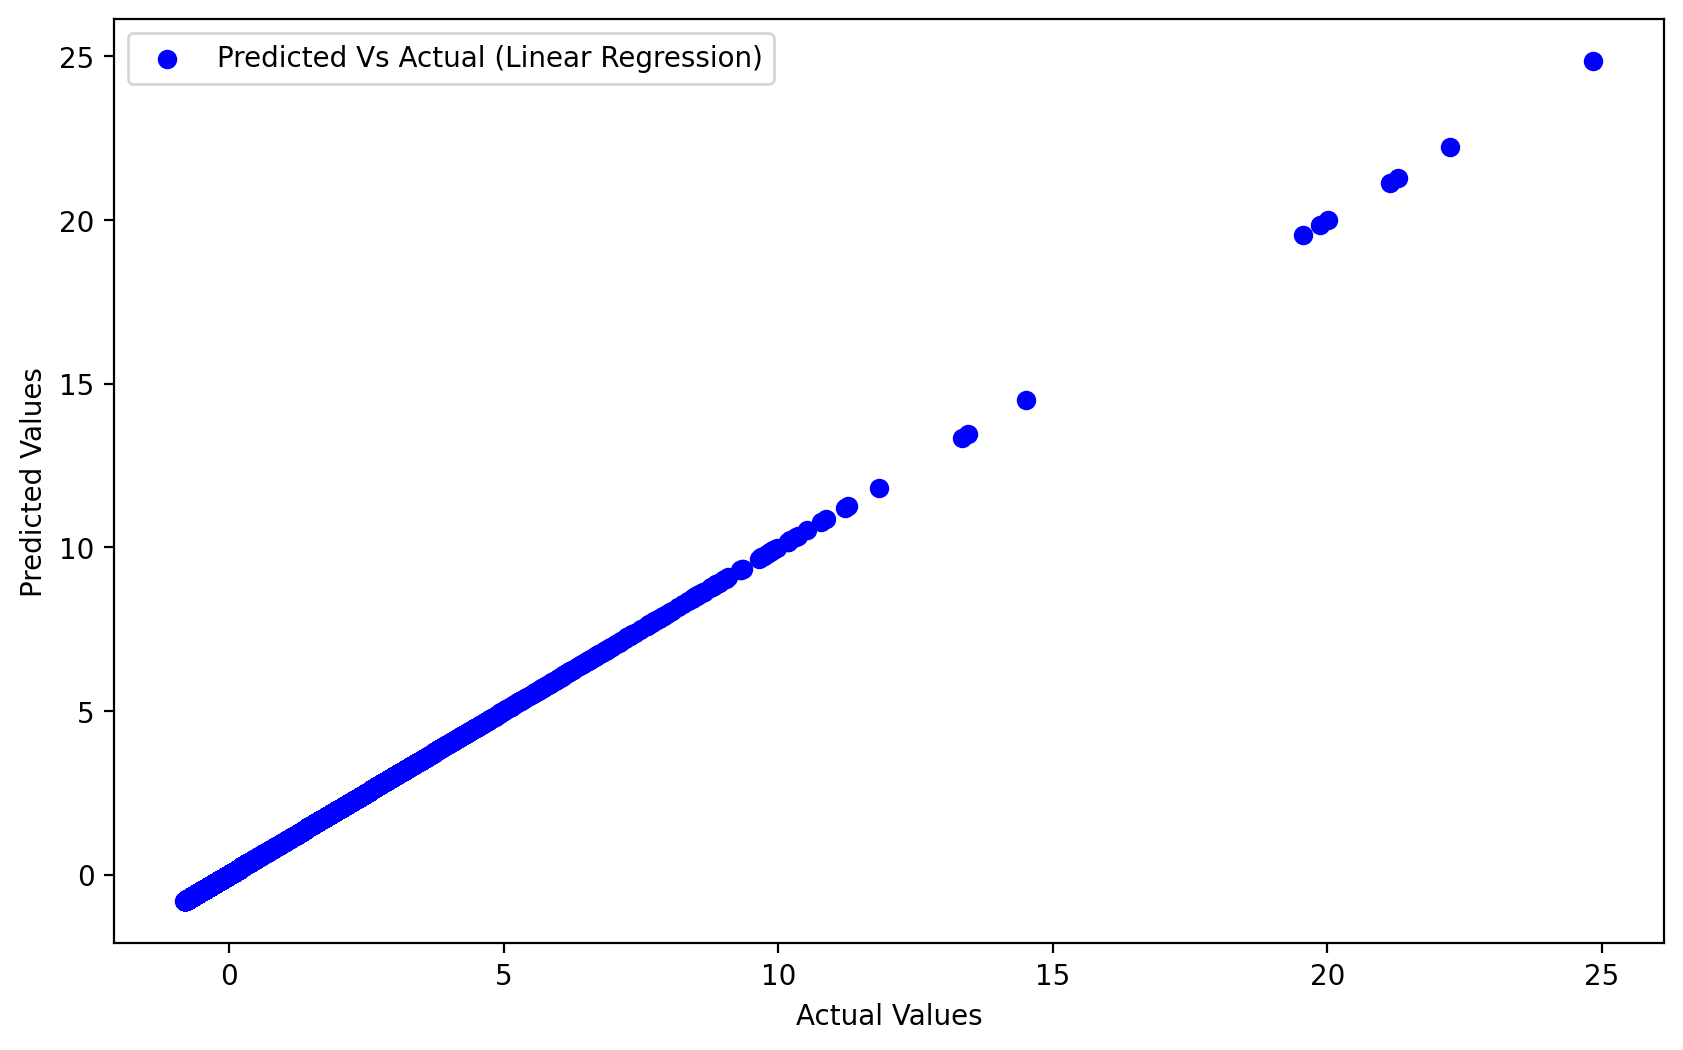

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, lr_y_pred, color='blue', label='Predicted Vs Actual (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Lasso Regressor

In [63]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [64]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-4.6232017942008874e-08


In [65]:
lasso_y_pred = lasso_regressor.predict(X_test)
lasso_mse = round(mean_squared_error(y_test, lasso_y_pred), 3)
lasso_rmse = round(sqrt(lasso_mse), 3)
lasso_mae = round(mean_absolute_error(y_test, lasso_y_pred))
lasso_ev = round(explained_variance_score(y_test, lasso_y_pred))
lasso_r2_value = round(r2_score(y_test, lasso_y_pred), 3)

model_rmse['Lasso Regression'] = lasso_rmse
model_r2['Lasso Regression'] = lasso_r2_value
model_mae['Lasso Regression'] = lasso_mse
model_ev['Lasso Regression'] = lasso_ev

print('Root Mean Squared Error of Lasso Regression is : {}'.format(lasso_rmse))
print('R-squared value of Lasso Regression is : {}'.format(lasso_r2_value))
print('Mean Absolute Error for Lasso Regression is: ', lasso_mae)
print('Explained Variance Score for Lasso Regression is:', lasso_ev)

Root Mean Squared Error of Lasso Regression is : 0.0
R-squared value of Lasso Regression is : 1.0
Mean Absolute Error for Lasso Regression is:  0
Explained Variance Score for Lasso Regression is: 1


In [66]:
l_train_score = lasso_regressor.score(X_train, y_train)
l_test_score = lasso_regressor.score(X_test, y_test)

print('Train Score:', l_train_score)
print('Test Score:', l_test_score)

Train Score: -4.57051292758597e-08
Test Score: -4.3597162992232866e-08


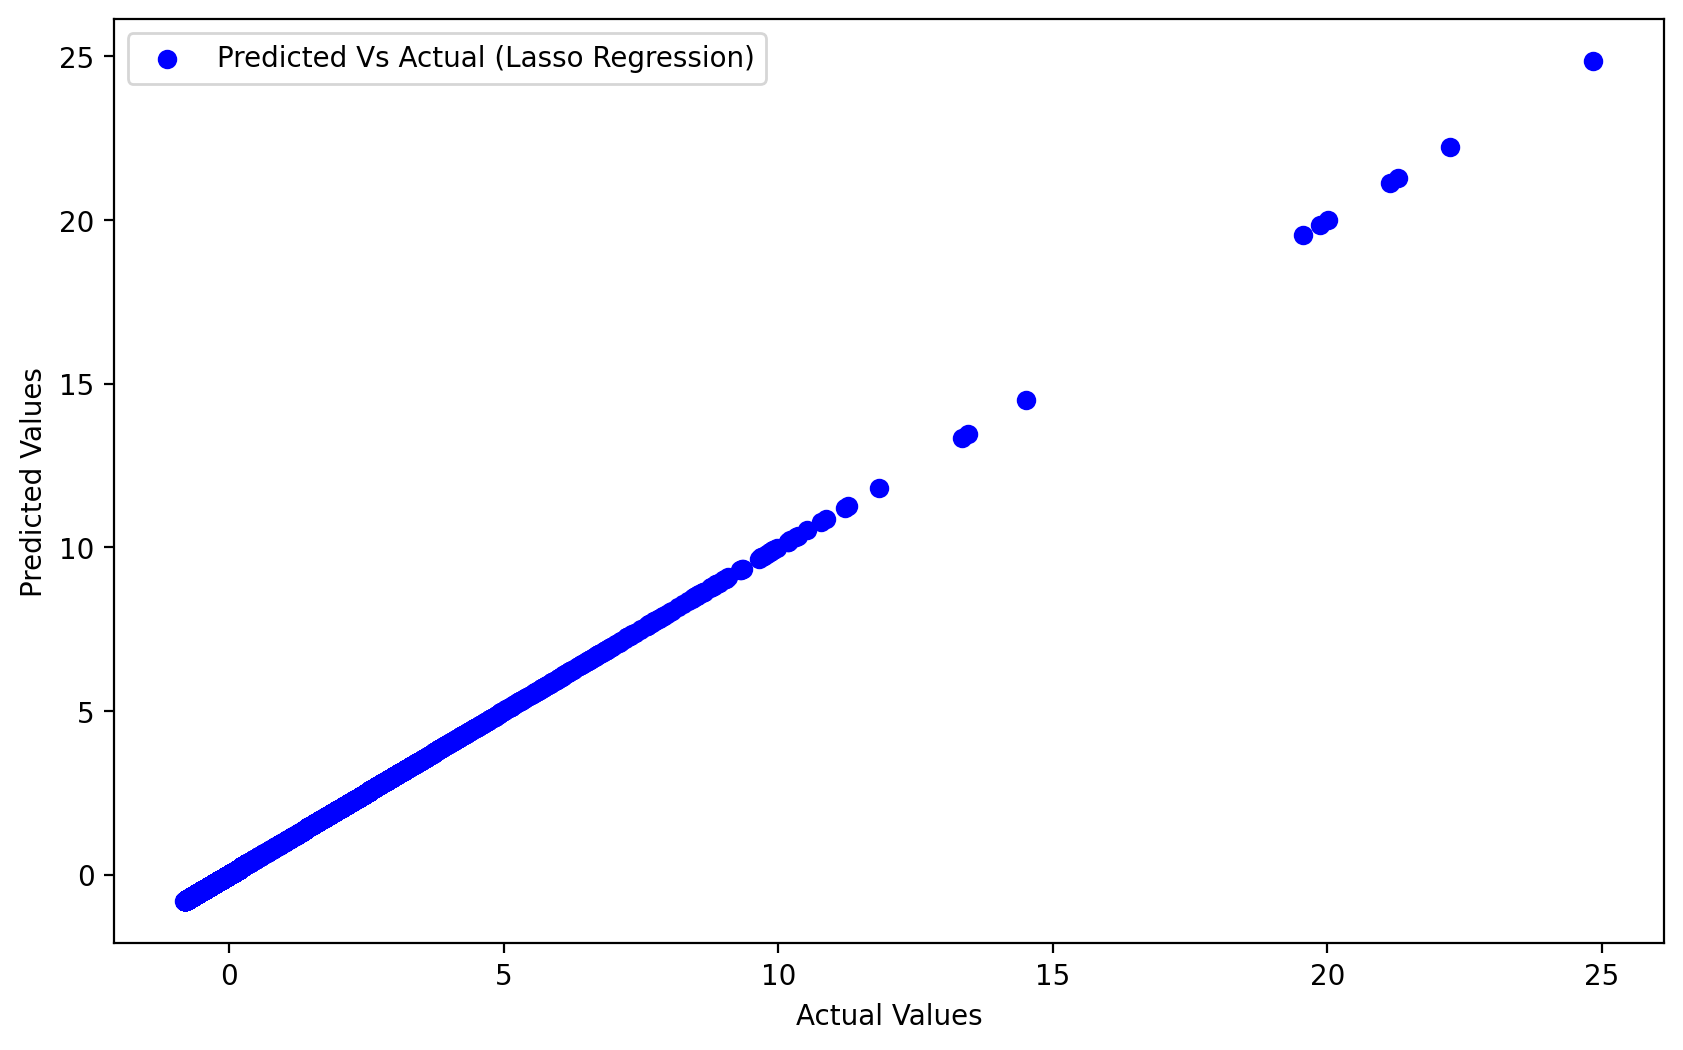

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, lasso_y_pred, color='blue', label='Predicted Vs Actual (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Decision Tree Regressor

In [68]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [69]:
dt_y_pred = decision_tree_regressor.predict(X_test)
dt_mse = round(mean_squared_error(y_test, dt_y_pred), 3)
dt_rmse = round(sqrt(dt_mse), 3)

dt_ev = round(explained_variance_score(y_test, dt_y_pred))
dt_r2_value = round(r2_score(y_test, dt_y_pred), 3)
dt_mae = round(mean_squared_error(y_test, dt_y_pred), 3)

model_rmse['Decision Tree Regression'] = dt_rmse
model_r2['Decision Tree Regression'] = dt_r2_value
model_mae['Decision Tree Regression'] = dt_mae
model_ev['Decision Tree Regression'] = dt_ev

print('Root Mean Squared Error of Decision Tree Regression is : {}'.format(dt_rmse))
print('R-squared value of Decision Tree Regression is : {}'.format(dt_r2_value))
print('Mean Absolute Error for Lasso Regression is: ', dt_mae)
print('Explained Variance Score for Lasso Regression is:', dt_ev)

Root Mean Squared Error of Decision Tree Regression is : 0.032
R-squared value of Decision Tree Regression is : 1.0
Mean Absolute Error for Lasso Regression is:  0.001
Explained Variance Score for Lasso Regression is: 1


In [70]:

dt_train_score = decision_tree_regressor.score(X_train, y_train)
dt_test_score = decision_tree_regressor.score(X_test, y_test)

print('Train Score:', dt_train_score)
print('Test Score:', dt_test_score)

Train Score: 1.0
Test Score: 0.9995032260954082


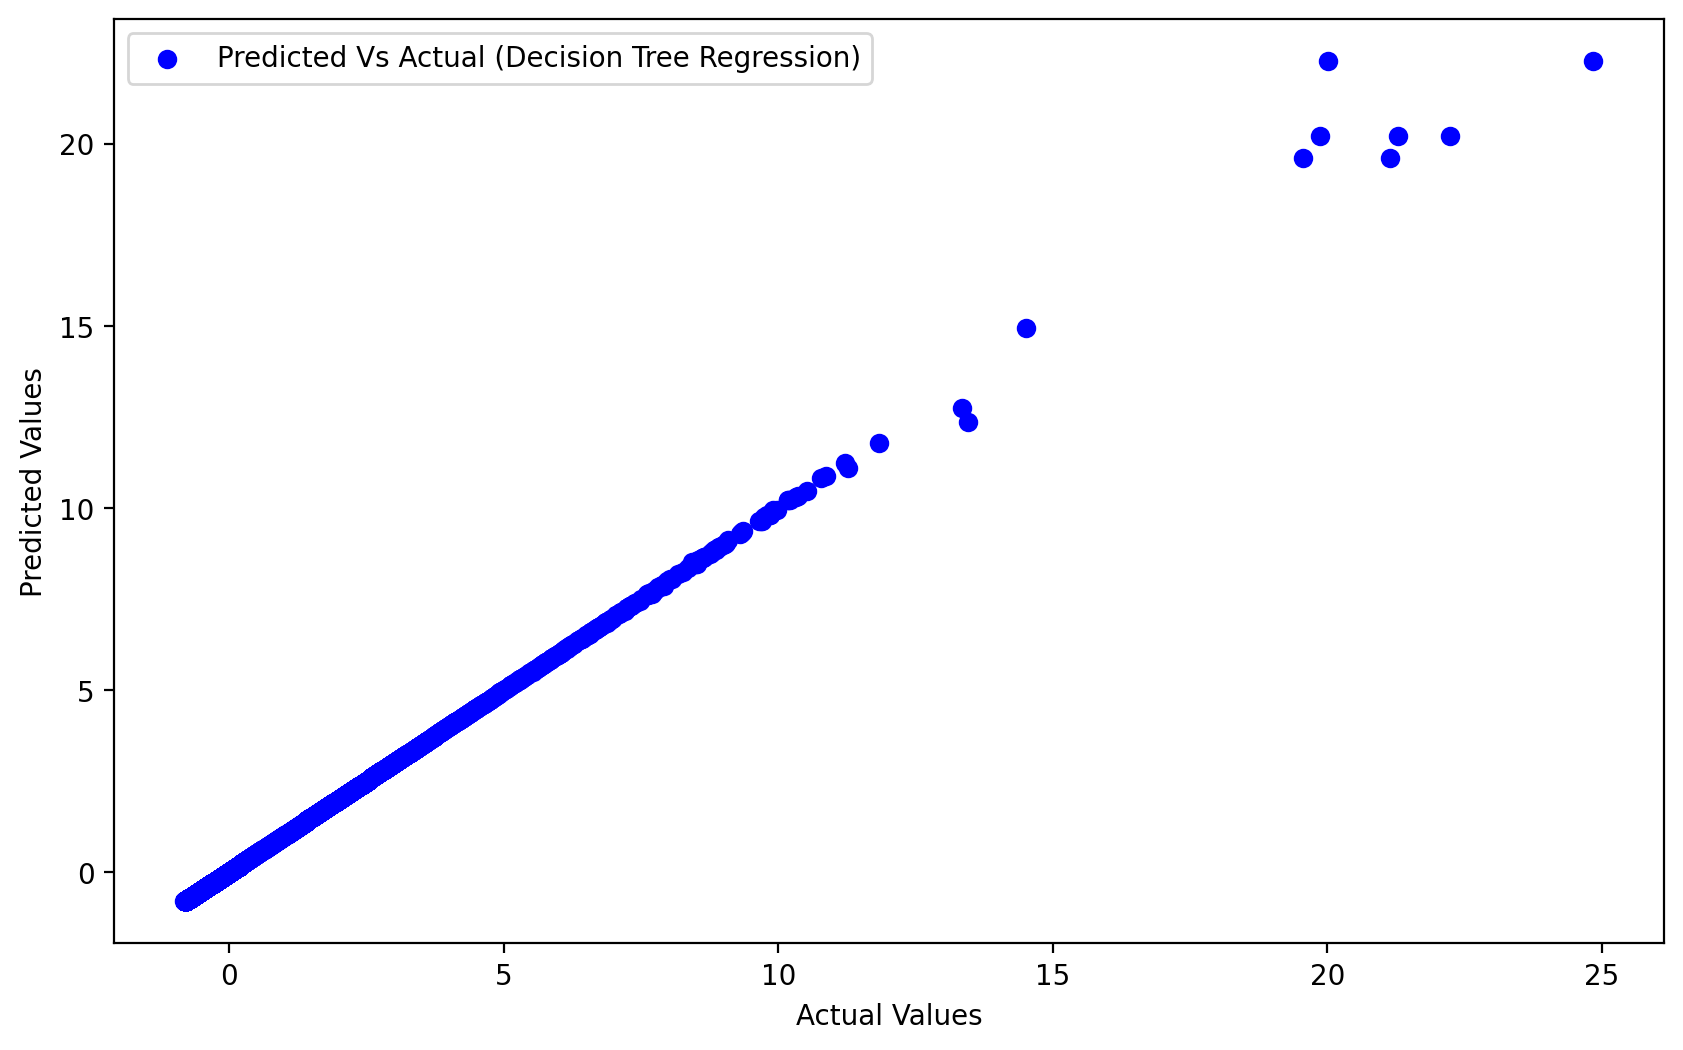

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, dt_y_pred, color='blue', label='Predicted Vs Actual (Decision Tree Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Random Forest Regressor (100 Trees)

In [72]:
random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 27)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=27)

In [77]:
rf_y_pred = random_forest_regressor.predict(X_test)

rf_mse = round(mean_squared_error(y_test, rf_y_pred), 3)
rf_rmse = round(sqrt(rf_mse), 3)
rf_mae = round(mean_absolute_error(y_test, rf_y_pred), 3)
rf_ev = round(explained_variance_score(y_test, rf_y_pred))
rf_r2_value = round(r2_score(y_test, rf_y_pred), 3)

model_rmse['Random Forest Regression (100 trees)'] = rf_rmse
model_r2['Random Forest Regression (100 trees)'] = rf_r2_value
model_mae['Random Forest Regression (100 trees)'] = rf_mae
model_ev['Random Forest Regression (100 trees)'] = rf_ev

print('Root Mean Squared Error of Random Forest Regression (100 trees) is : {}'.format(rf_rmse))
print('R-squared value of Random Forest Regression (100 trees) is : {}'.format(rf_r2_value))
print('Mean Absolute Error for Random Forest Regression is: ', rf_mae)
print('Explained Variance Score for Random Forest Regression is:', rf_ev)

Root Mean Squared Error of Random Forest Regression (100 trees) is : 0.032
R-squared value of Random Forest Regression (100 trees) is : 0.999
Mean Absolute Error for Random Forest Regression is:  0.0
Explained Variance Score for Random Forest Regression is: 1


In [74]:
rf_train_score = random_forest_regressor.score(X_train, y_train)
rf_test_score = random_forest_regressor.score(X_test, y_test)

print('Train Score:', rf_train_score)
print('Test Score:', rf_test_score)

Train Score: 0.9998595363600049
Test Score: 0.9994688105038232


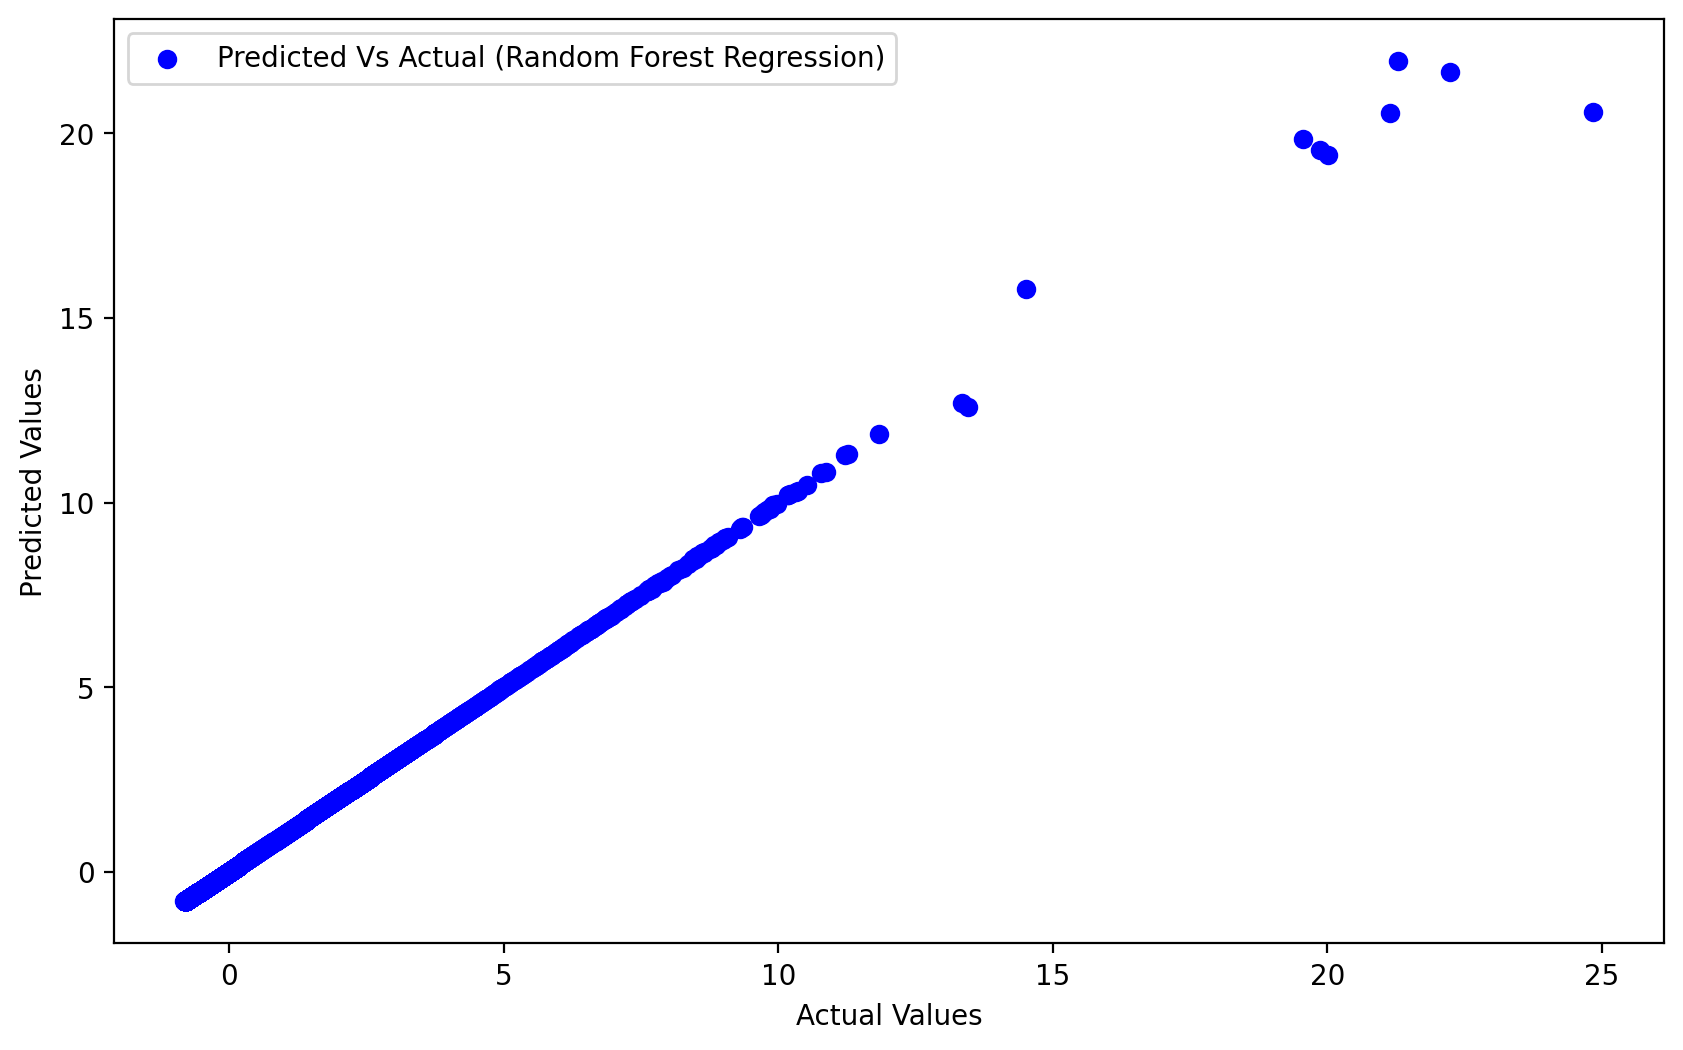

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, rf_y_pred, color='blue', label='Predicted Vs Actual (Random Forest Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## RandomForestRegressor 25 Trees

In [76]:
random_forest_regressor25 = RandomForestRegressor(n_estimators = 25, random_state = 27)
random_forest_regressor25.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=27)

In [78]:
rf_y_pred25 = random_forest_regressor25.predict(X_test)

rf_mse25 = round(mean_squared_error(y_test, rf_y_pred25), 3)
rf_rmse25 = round(sqrt(rf_mse25), 3)
rf_mae25 = round(mean_absolute_error(y_test, rf_y_pred25), 3)
rf_ev25 = round(explained_variance_score(y_test, rf_y_pred25))
rf_r2_value25 = round(r2_score(y_test, rf_y_pred25), 3)

model_rmse['Random Forest Regression (25 trees)'] = rf_rmse25
model_r2['Random Forest Regression (25 trees)'] = rf_r2_value25
model_mae['Random Forest Regression (25 trees)'] = rf_mae25
model_ev['Random Forest Regression (25 trees)'] = rf_ev25

print('Root Mean Squared Error of Random Forest Regression (25 trees) is : {}'.format(rf_rmse25))
print('R-squared value of Random Forest Regression (25 trees) is : {}'.format(rf_r2_value25))
print('Mean Absolute Error for Random Forest Regression is (25 trees): ', rf_mae25)
print('Explained Variance Score for Random Forest Regression is (25 trees):', rf_ev25)

Root Mean Squared Error of Random Forest Regression (25 trees) is : 0.032
R-squared value of Random Forest Regression (25 trees) is : 0.999
Mean Absolute Error for Random Forest Regression is (25 trees):  0.0
Explained Variance Score for Random Forest Regression is (25 trees): 1


In [80]:
rf_train_score25 = random_forest_regressor25.score(X_train, y_train)
rf_test_score25 = random_forest_regressor25.score(X_test, y_test)

print('Train Score:', rf_train_score25)
print('Test Score:', rf_test_score25)

Train Score: 0.9997976593979357
Test Score: 0.9992216349092774


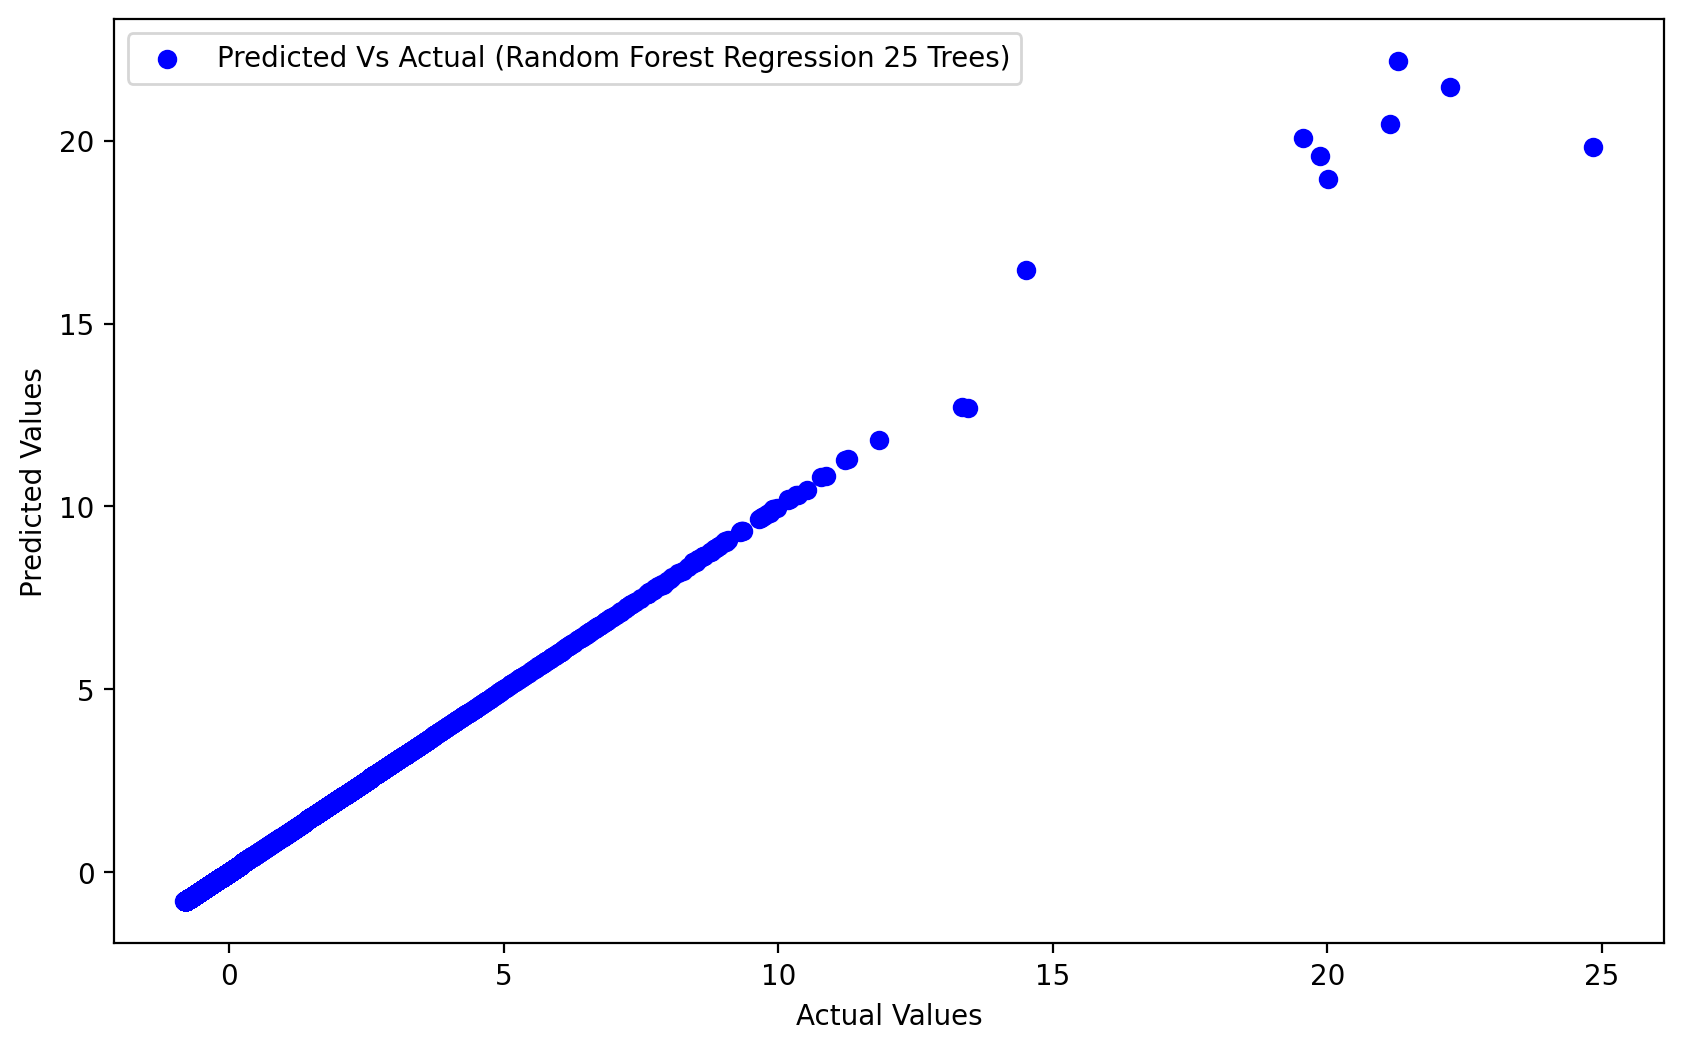

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, rf_y_pred25, color='blue', label='Predicted Vs Actual (Random Forest Regression 25 Trees)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [82]:
# Cross-validation scores
cv_scores = {}
for model in [lr, lasso_regressor, decision_tree_regressor, random_forest_regressor]:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_scores[type(model).__name__] = -scores

for model, scores in cv_scores.items():
    print(f"Cross-validation scores for {model}: {scores}")

Cross-validation scores for LinearRegression: [1.00287054e-15 7.00141936e-16 5.89256399e-16 7.21091253e-16
 1.31506875e-15]
Cross-validation scores for GridSearchCV: [0.00013865 0.00014389 0.00013695 0.00012954 0.00013692]
Cross-validation scores for DecisionTreeRegressor: [5.16163315e-04 2.63356772e-04 8.81552143e-05 6.60886890e-04
 1.94606794e-04]
Cross-validation scores for RandomForestRegressor: [5.74887288e-04 2.24890050e-04 9.28568257e-05 3.13350204e-04
 1.60642087e-04]


The cross validation for all the models are relatively low, which suggest a good performance of the models

## Fine Tuning the Selected Models

In [83]:
lasso = Lasso()
lasso_params = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100] }
lasso_grid_search = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search.fit(X_train, y_train)
print('best Parameters for Lasso Regression:', lasso_grid_search.best_params_)
print('best score for Lasso Regression:', lasso_grid_search.best_score_)

best Parameters for Lasso Regression: {'alpha': 1e-08}
best score for Lasso Regression: -4.6232017942008874e-08


In [84]:
dt = DecisionTreeRegressor()
dt_params = {'max_depth': [None, 5, 10, 15, 20],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
dt_grid_search = GridSearchCV(dt, dt_params, scoring='neg_mean_squared_error', cv=5)
dt_grid_search.fit(X_train, y_train)

print('Best parameters for Decision Tree Regression:', dt_grid_search.best_params_)
print('Best score for Decision Tree regression:', dt_grid_search.best_score_)

Best parameters for Decision Tree Regression: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score for Decision Tree regression: -0.0008896592845844122


In [87]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# rf = RandomForestRegressor()
# rf_params = {'n_estimators': randint(25, 200),
#              'max_depth': [None, 5, 10, 15],
#              'min_samples_split': randint(2, 20),
#              'min_samples_leaf': randint(1,20)}

# rf_grid_search = RandomizedSearchCV(rf, rf_params, n_iter=10,
#                               scoring='neg_mean_squared_error',
#                               cv=5, random_state=27, n_jobs=-1)
# rf_grid_search.fit(X_train, y_train)

# print('Best parameters of Random Forest Regressor is:', rf_grid_search.best_params_)
# print('Best Scores for Ramdom Forest Regresssor is:', rf_grid_search.best_score_)

## Evaluating the Hyperparameter Models

In [88]:
lasso_y_pred = lasso_grid_search.predict(X_test)
dt_y_pred = dt_grid_search.predict(X_test)

# rmse

lasso_rmse =mean_squared_error(y_test, lasso_y_pred, squared=False)
dt_rmse = mean_squared_error(y_test, dt_y_pred, squared=False)

#mae

lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)

# Explained Variance Score

lasso_ev = explained_variance_score(y_test, lasso_y_pred)
dt_ev = explained_variance_score(y_test, dt_y_pred)

# r2

lasso_r2_value = r2_score(y_test, lasso_y_pred)
dt_r2_value = r2_score(y_test, dt_y_pred)

In [89]:
print("Lasso Regressionn:")
print("RMSE:", lasso_rmse)
print("MAE:", lasso_mae)
print("Explained Variance Score:", lasso_ev)
print("R2 Score:", lasso_r2_value)
print()

Lasso Regressionn:
RMSE: 0.00020879933666617063
MAE: 0.0001357365103666659
Explained Variance Score: 0.9999999587547688
R2 Score: 0.9999999587523092



In [90]:
print("Decision Tree Regressionn:")
print("RMSE:", dt_rmse)
print("MAE:", dt_mae)
print("Explained Variance Score:", dt_ev)
print("R2 Score:", dt_r2_value)
print()

Decision Tree Regressionn:
RMSE: 0.09365637814057676
MAE: 0.0008834153725242189
Explained Variance Score: 0.9917012005068705
R2 Score: 0.9917011841351189



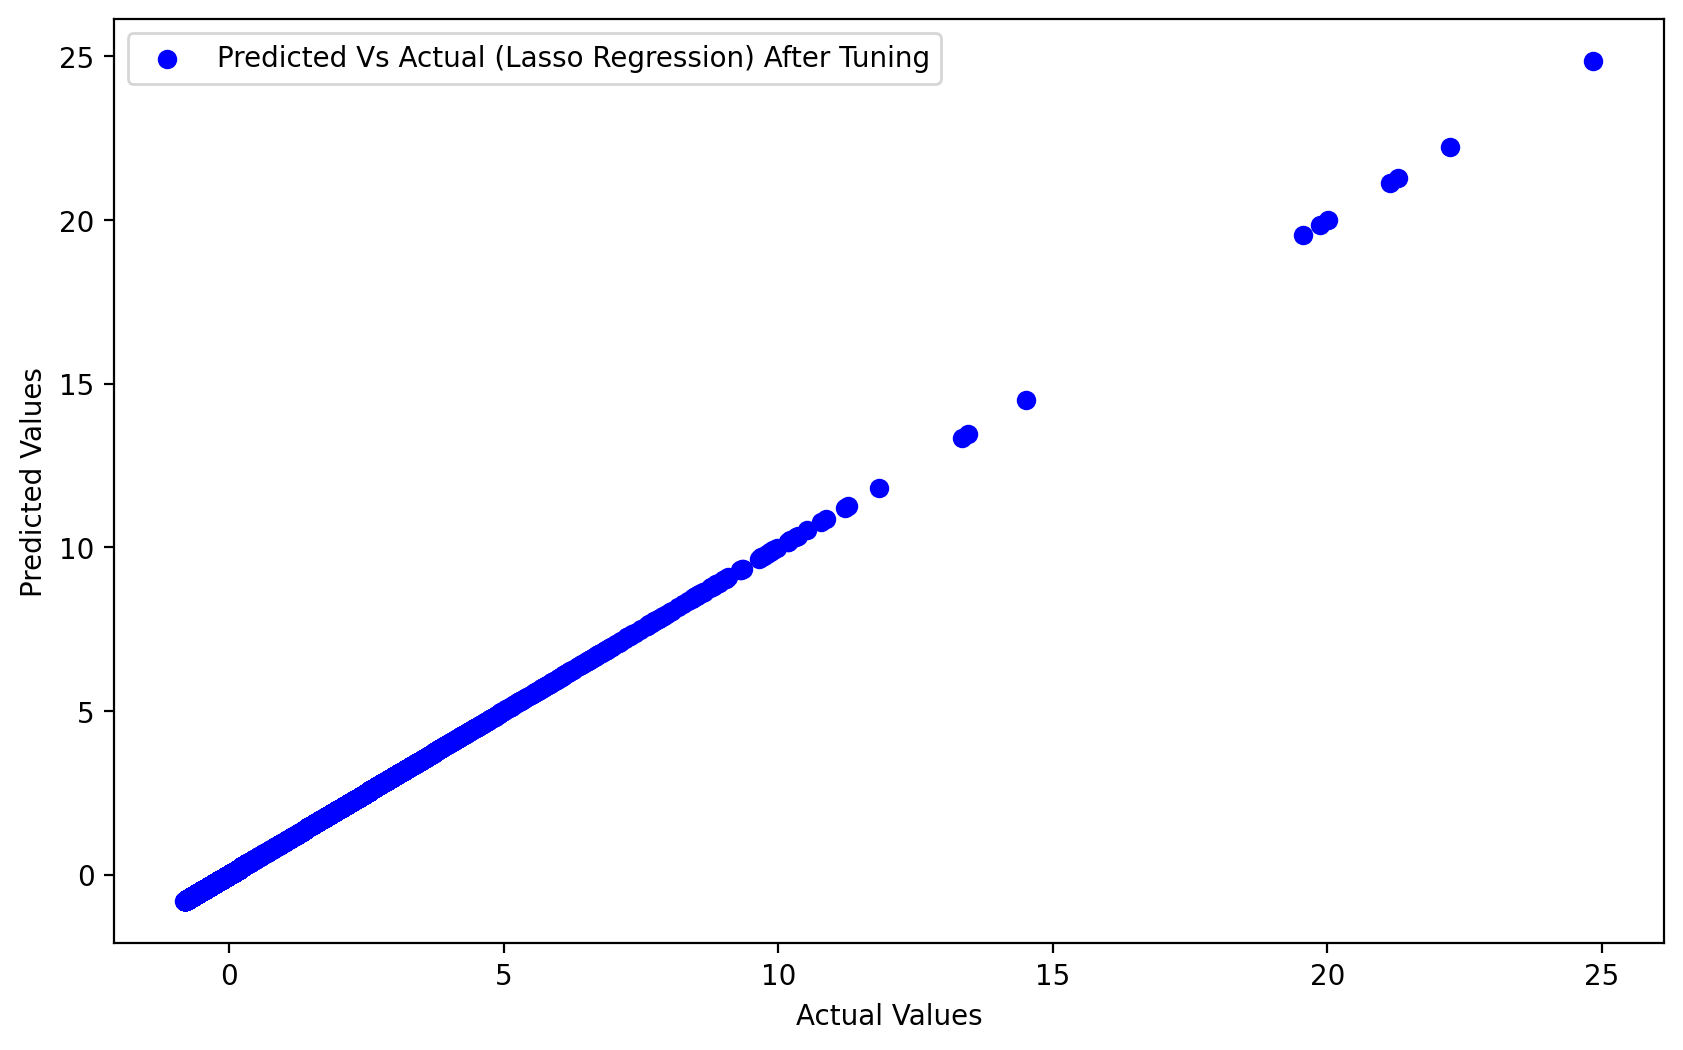

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, lasso_y_pred, color='blue', label='Predicted Vs Actual (Lasso Regression) After Tuning')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

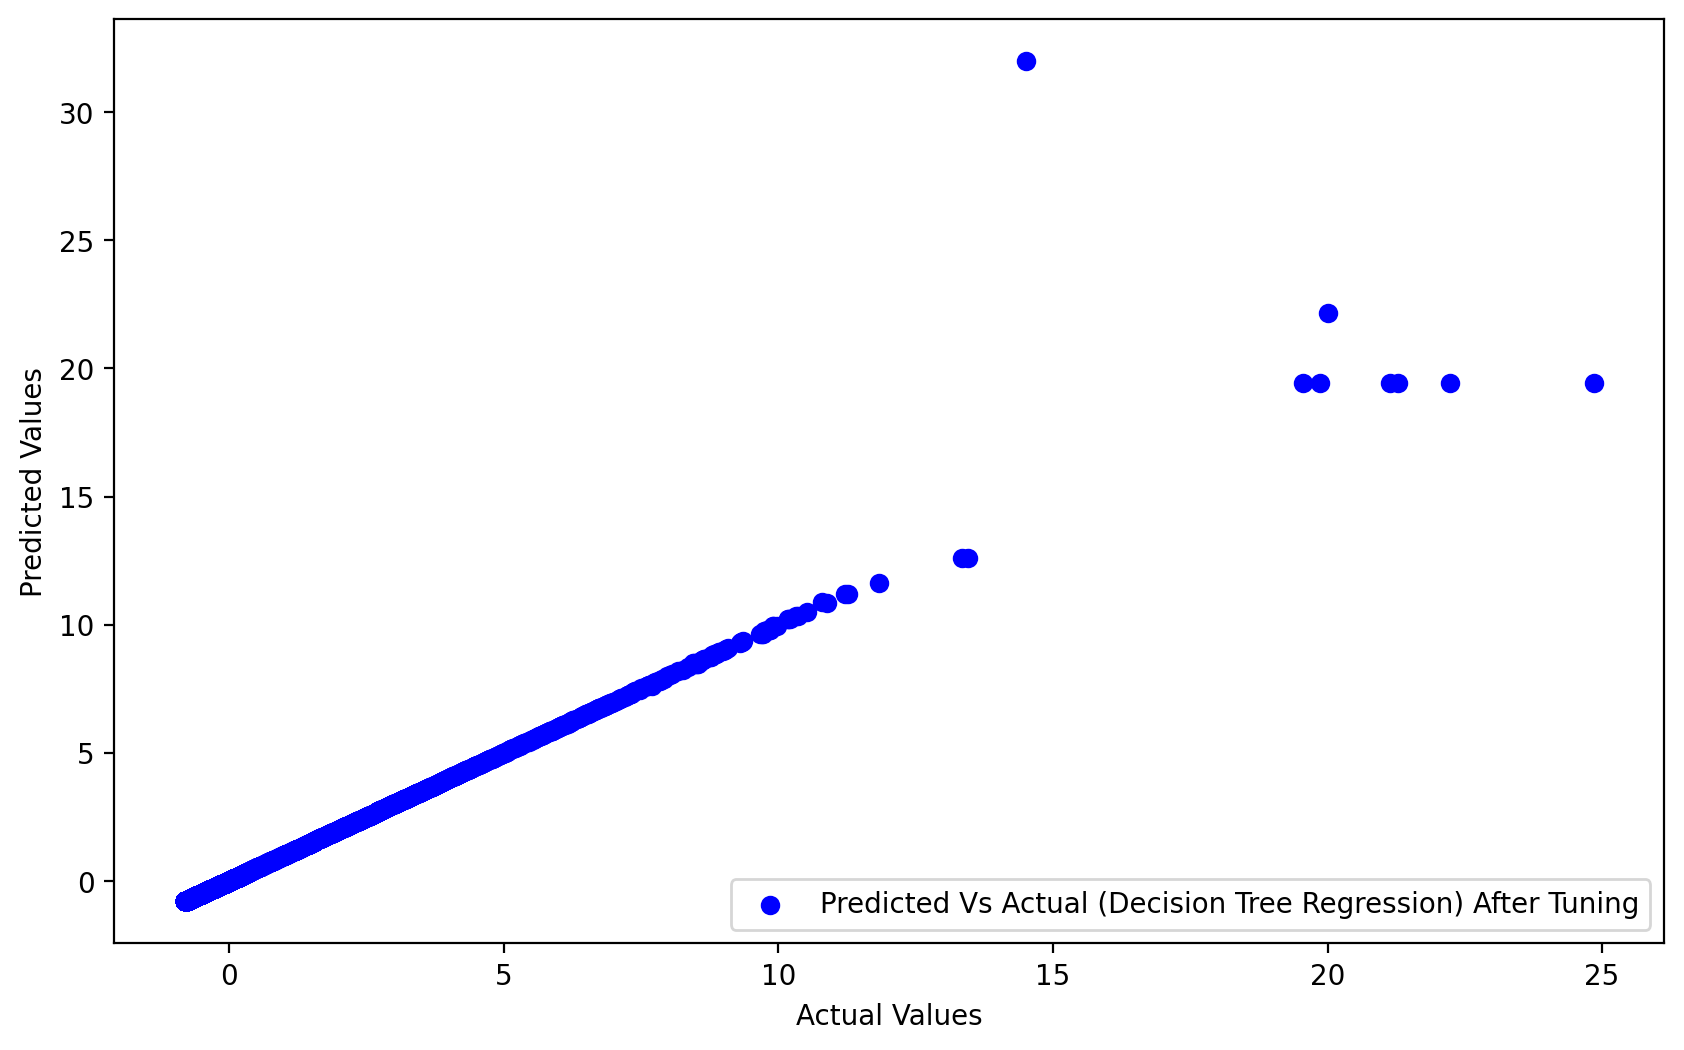

In [92]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, dt_y_pred, color='blue', label='Predicted Vs Actual (Decision Tree Regression) After Tuning')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [93]:
from sklearn.model_selection import KFold


# Base models
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42))
]

# Meta model
meta_model = LinearRegression()

# Additional model
lasso_model = Lasso(alpha=0.1)

# Stacking ensemble
def stacking_ensemble(base_models, meta_model, X_train, y_train, X_test, kfolds):
    meta_train = np.zeros((X_train.shape[0], len(base_models) + 1))
    meta_test = np.zeros((X_test.shape[0], len(base_models) + 1))

    for i, (name, model) in enumerate(base_models):
        for train_idx, val_idx in kfolds.split(X_train):
            model.fit(X_train[train_idx], y_train[train_idx])
            meta_train[val_idx, i] = model.predict(X_train[val_idx])

        meta_test[:, i] = model.predict(X_test)

    # Fitting and predicting with the additional model
    lasso_model.fit(X_train, y_train)
    meta_train[:, -1] = lasso_model.predict(X_train)
    meta_test[:, -1] = lasso_model.predict(X_test)

    meta_model.fit(meta_train, y_train)
    stacked_predictions = meta_model.predict(meta_test)
    return stacked_predictions

# KFold cross-validation
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

# Generating stacked predictions
stacked_predictions = stacking_ensemble(base_models, meta_model, X_train.values, y_train.values, X_test.values, kfolds)

# Evaluating the performance
mse = mean_squared_error(y_test, stacked_predictions)
print("Stacking Ensemble RMSE:", np.sqrt(mse))

Stacking Ensemble RMSE: 2.0122370756558324e-15


In [94]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# List to store RMSE scores for each fold
rmse_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()

    # Train your model on the training fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the test fold
    y_pred_fold = model.predict(X_test_fold)

    # Calculate RMSE for the fold
    rmse_fold = np.sqrt(mean_squared_error(y_test_fold, y_pred_fold))

    # Append RMSE score to the list
    rmse_scores.append(rmse_fold)

# Calculate the mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)

# Calculate the standard deviation of RMSE across all folds
std_rmse = np.std(rmse_scores)

print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)

Mean RMSE: 1.5679595811699186e-15
Standard Deviation of RMSE: 4.146542494474675e-16


# Decision Tree Feature Importance

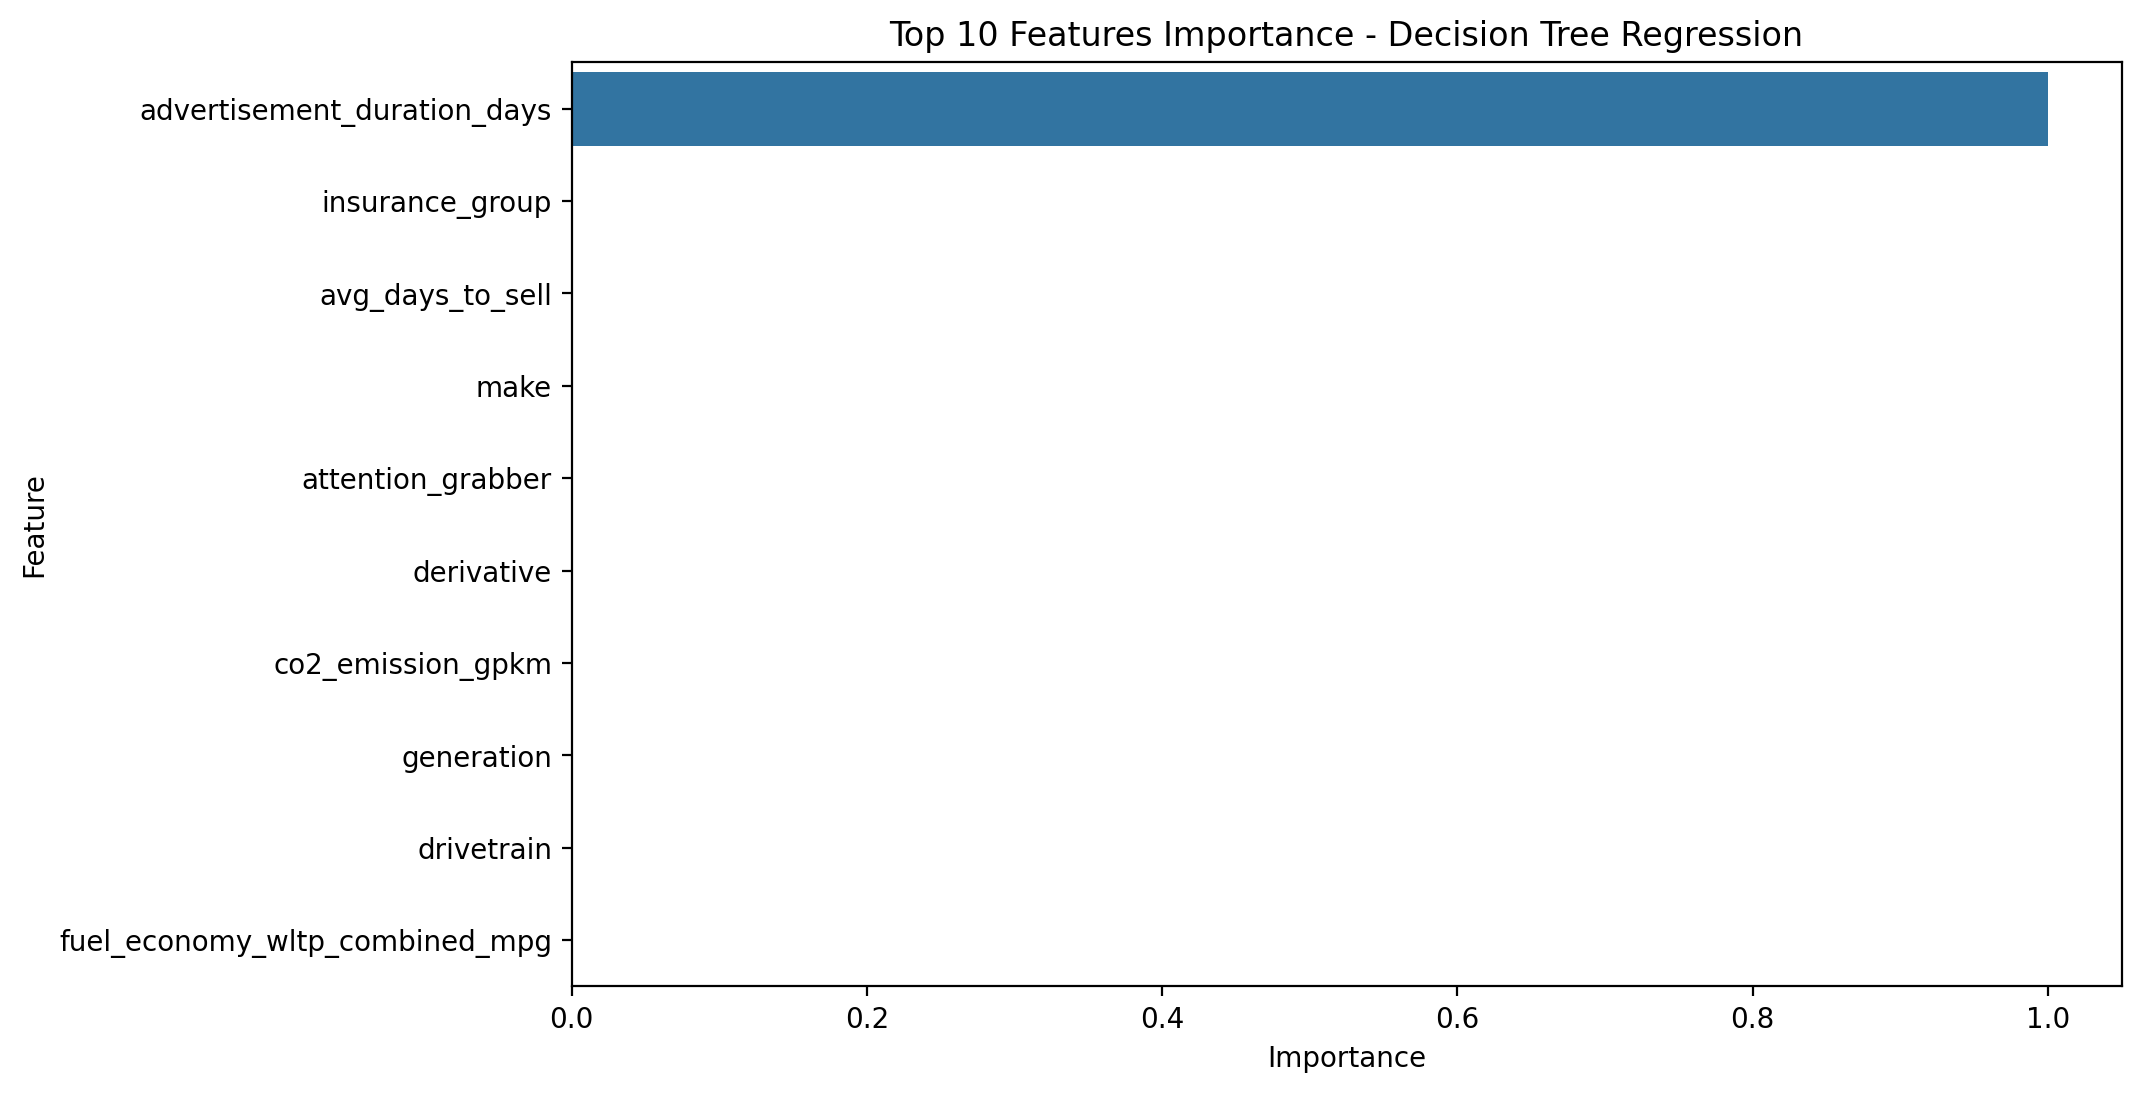

In [95]:
dt_feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': decision_tree_regressor.feature_importances_})
dt_feature_importance = dt_feature_importance.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=dt_feature_importance[:10])
plt.title('Top 10 Features Importance - Decision Tree Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [96]:
dt_feature_importance

,feature,importance
27,advertisement_duration_days,9.999033e-01
11,insurance_group,6.233237e-05
32,avg_days_to_sell,1.542472e-05
12,make,7.916889e-06
22,attention_grabber,6.053940e-06
15,derivative,2.310094e-06
5,co2_emission_gpkm,1.126738e-06
14,generation,8.101973e-07
19,drivetrain,1.758375e-07
9,fuel_economy_wltp_combined_mpg,1.081081e-07


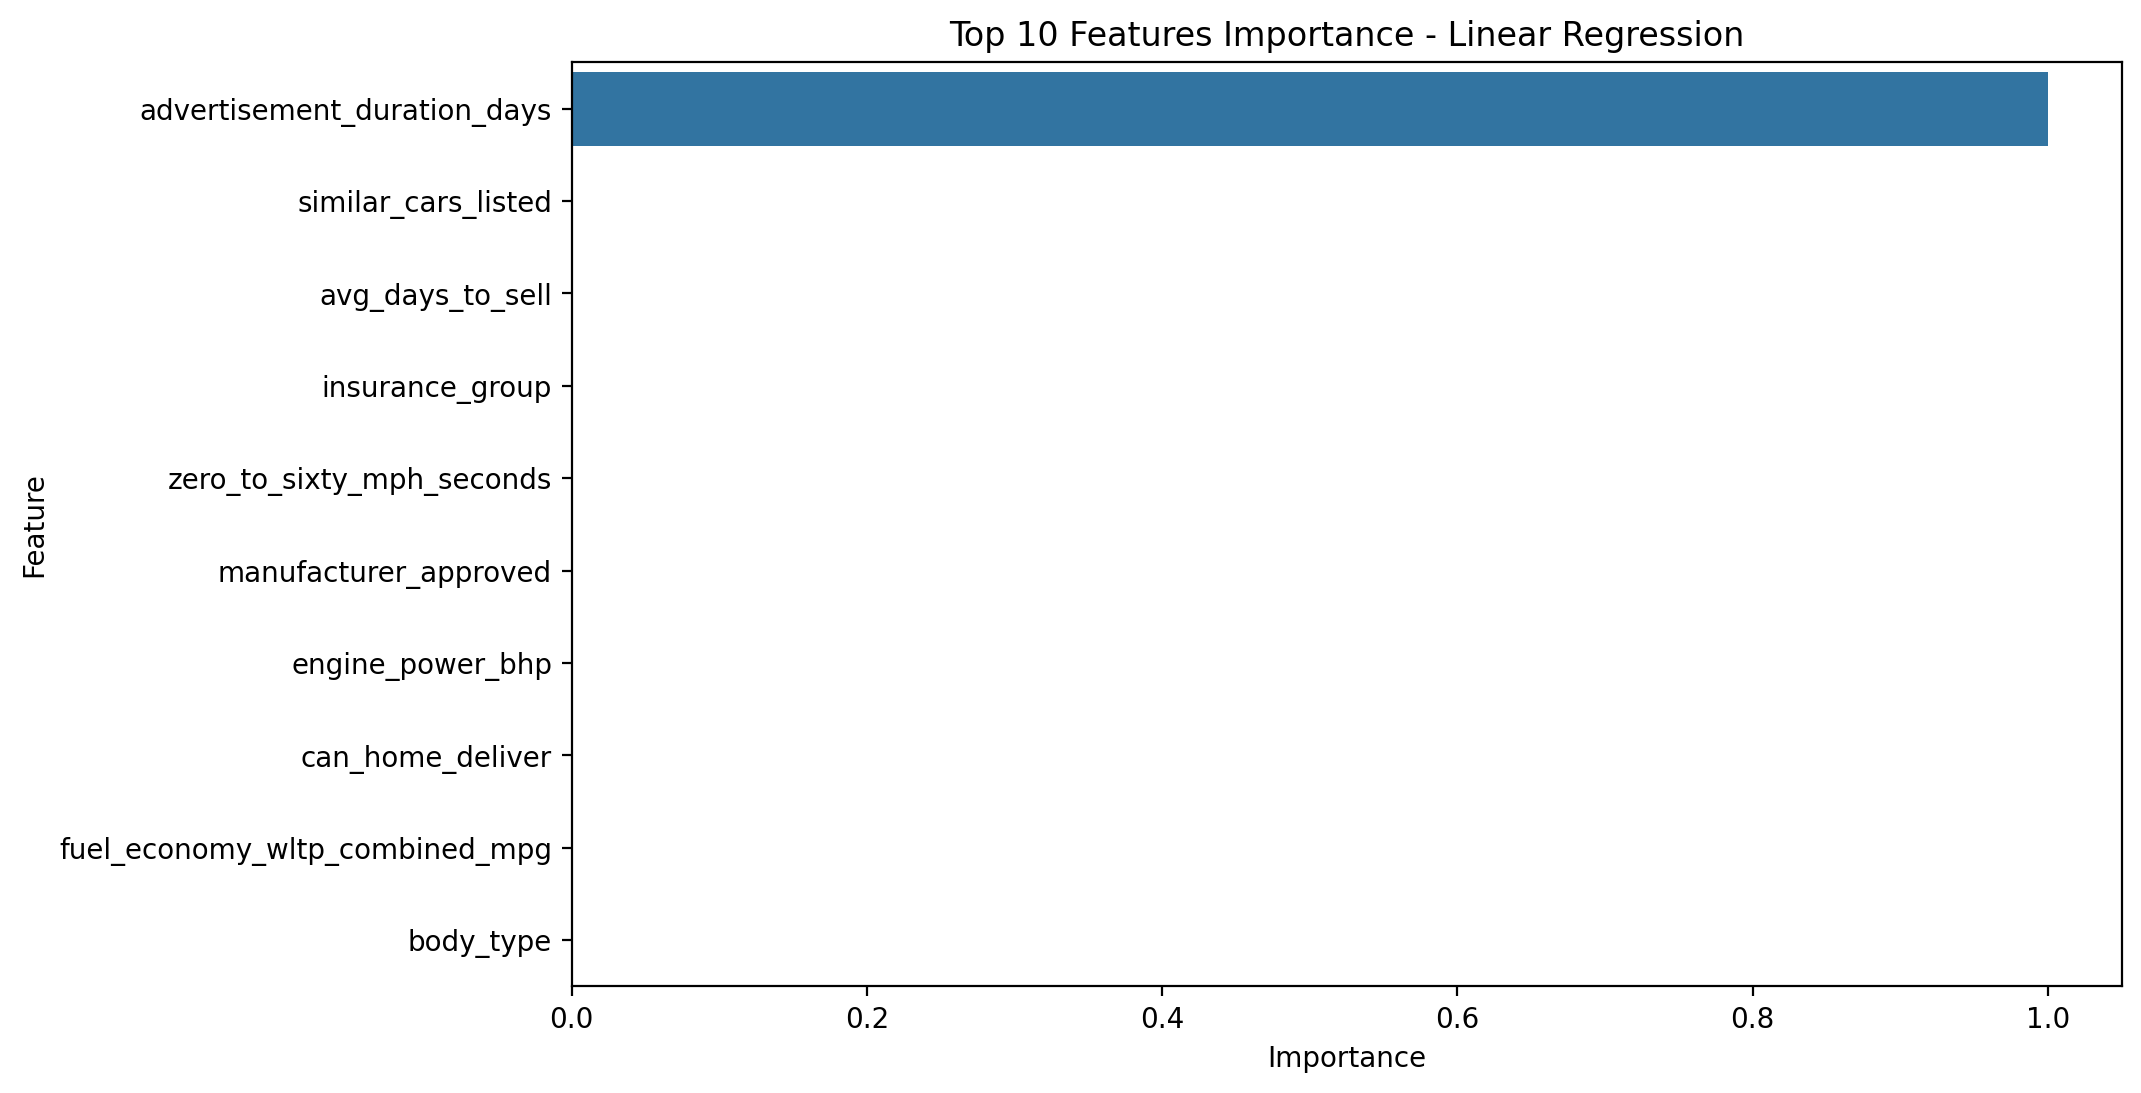

In [97]:
# Feature importance for Linear Regression and Lasso Regression
linear_coeffs = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(lr.coef_)})
linear_coeffs = linear_coeffs.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=linear_coeffs[:10])
plt.title('Top 10 Features Importance - Linear Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [98]:
linear_coeffs

,feature,importance
27,advertisement_duration_days,1.000000e+00
29,similar_cars_listed,6.196767e-16
32,avg_days_to_sell,5.118020e-16
11,insurance_group,4.609323e-16
7,zero_to_sixty_mph_seconds,3.840319e-16
23,manufacturer_approved,2.043098e-16
8,engine_power_bhp,1.621199e-16
0,can_home_deliver,1.476084e-16
9,fuel_economy_wltp_combined_mpg,1.365111e-16
16,body_type,1.283291e-16


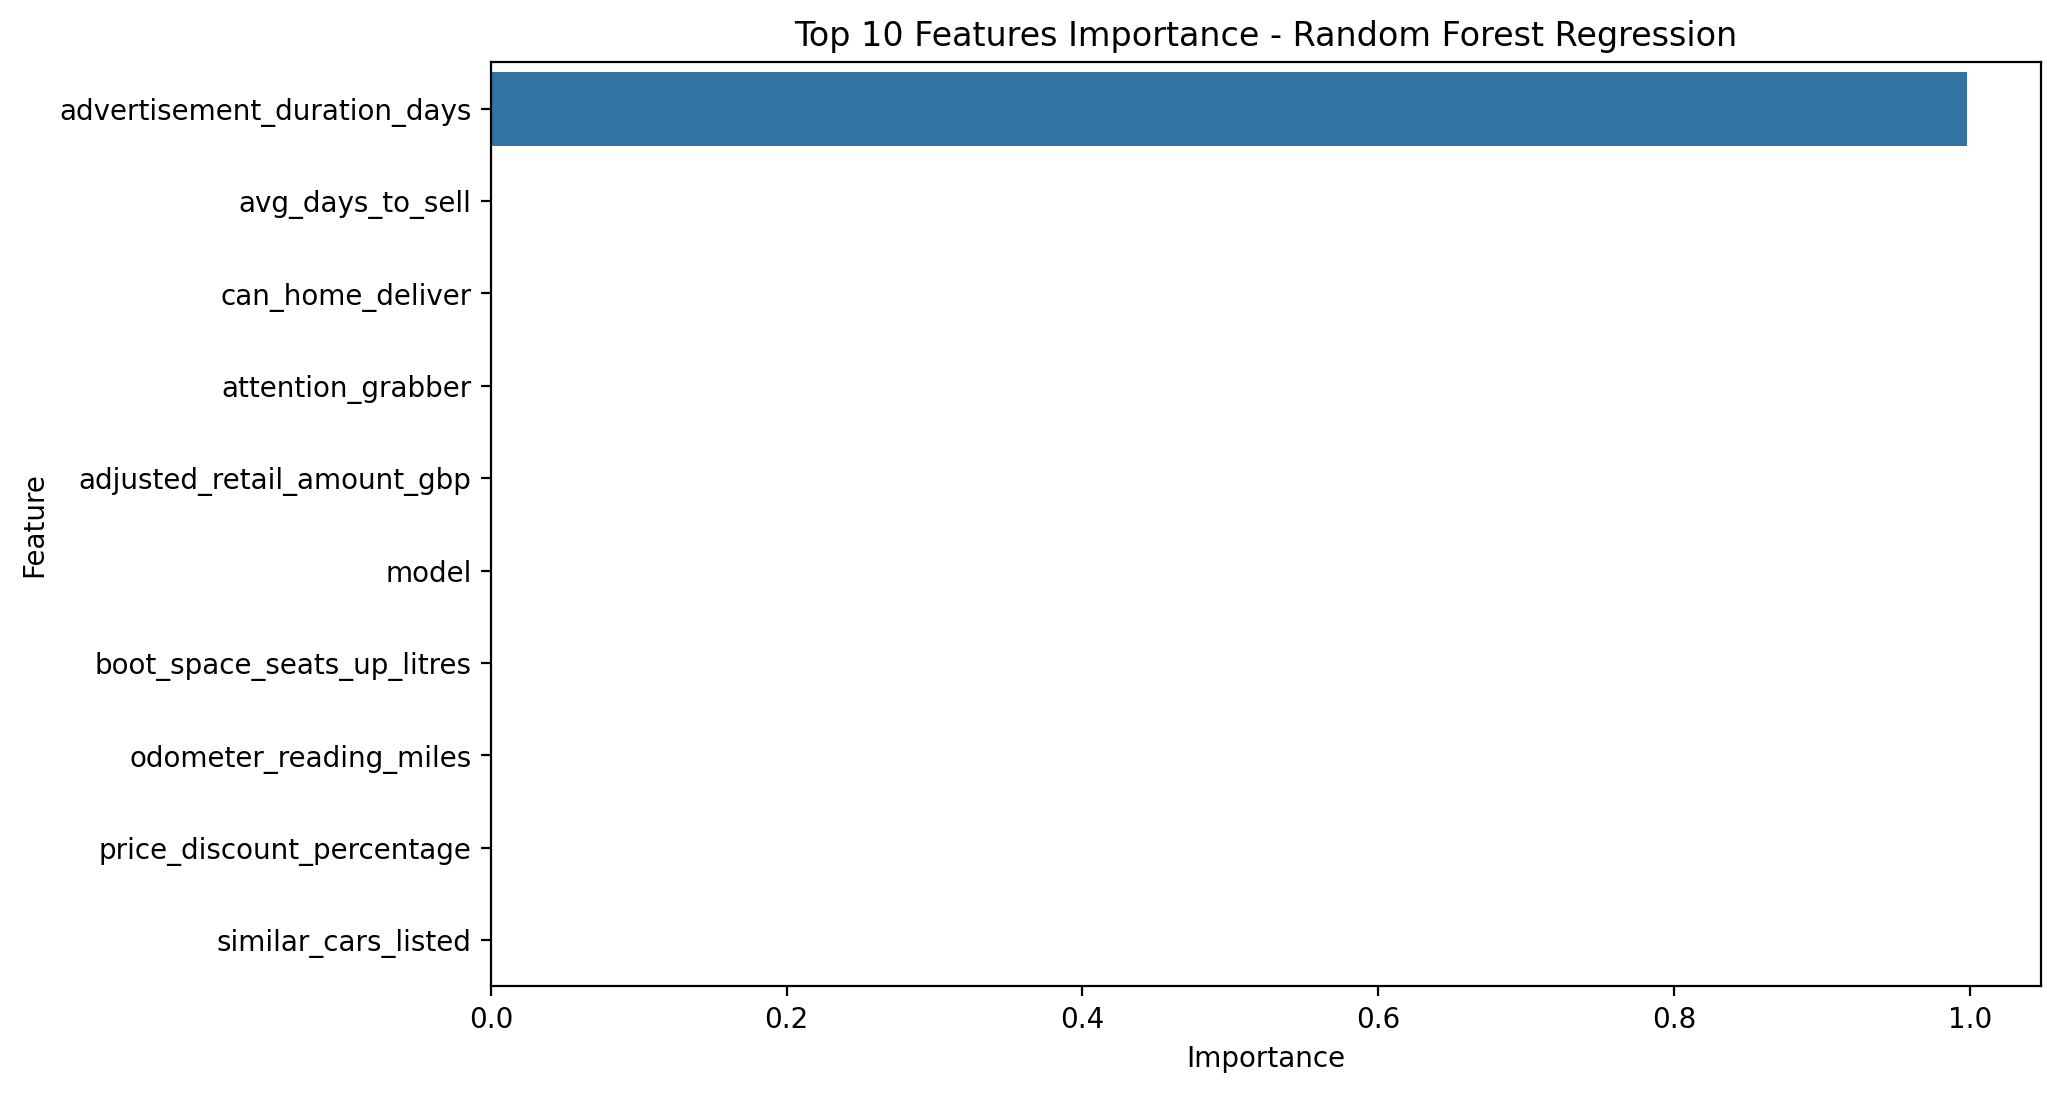

In [99]:
# Feature importance for Random Forest Regression
rf_feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': random_forest_regressor.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=rf_feature_importance[:10])
plt.title('Top 10 Features Importance - Random Forest Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [100]:
rf_feature_importance

,feature,importance
27,advertisement_duration_days,9.982522e-01
32,avg_days_to_sell,6.914001e-04
0,can_home_deliver,2.074140e-04
22,attention_grabber,1.724193e-04
25,adjusted_retail_amount_gbp,1.430408e-04
13,model,1.424967e-04
10,boot_space_seats_up_litres,1.062654e-04
21,odometer_reading_miles,5.834982e-05
30,price_discount_percentage,5.660673e-05
29,similar_cars_listed,4.052090e-05


advertisement_duration_days is consistently the most important feature across all three models, which suggest strong predictive power.

In [101]:
import joblib
joblib.dump(lr, 'auto trader.pkl')

['auto trader.pkl']